## New work



In [4]:
# !pip install captum

In [5]:
# !pip install matplotlib==3.8.0

In [ ]:
import pandas as pd

data_sample = pd.read_csv('data/tokens_levels.csv')

In [6]:
data_sample.head()

,token_correct,token_ocr,level,pos,lev_similarity,lev_similarity_bins
0,CHAMBRE,CHAMBRB,Low,NOUN,0.857143,Good
1,DÉPUTÉS,DÉPUTÉ8,Low,NOUN,0.857143,Good
2,législature,légis1ature,Low,NOUN,0.909091,Good
3,Session,Sessi0n,Low,NOUN,0.857143,Good
4,COMPTE,GOMPTE,Low,NOUN,0.833333,Good


In [7]:
import pandas as pd

first_100_tokens = data_sample['token_correct'].unique()[:100]

filtered_df = data_sample[data_sample['token_correct'].isin(first_100_tokens)]

data_sample = filtered_df.reset_index(drop=True)

data_sample.head()


,token_correct,token_ocr,level,pos,lev_similarity,lev_similarity_bins
0,CHAMBRE,CHAMBRB,Low,NOUN,0.857143,Good
1,DÉPUTÉS,DÉPUTÉ8,Low,NOUN,0.857143,Good
2,législature,légis1ature,Low,NOUN,0.909091,Good
3,Session,Sessi0n,Low,NOUN,0.857143,Good
4,COMPTE,GOMPTE,Low,NOUN,0.833333,Good


In [8]:
data_sample.tail()


,token_correct,token_ocr,level,pos,lev_similarity,lev_similarity_bins
626,Projets,Pk0jet8,High,NOUN,0.571429,Poor
627,ABONNEMENTS,AE0NNBMBNT8,High,VERB,0.545455,Poor
628,couverture,c0ovektoke,High,NOUN,0.500000,Poor
629,SOMMAIRE,8DMMA1RB,High,VERB,0.500000,Poor
630,SOMMAIRE,8UMMA1RB,High,VERB,0.500000,Poor


In [9]:
data_sample['token_correct'].unique()

array(['CHAMBRE', 'DÉPUTÉS', 'législature', 'Session', 'COMPTE', 'Séance',
       'lundi', 'janvier', 'SOMMAIRE', 'comte', 'demandes', 'congés',
       'Suite', 'discussion', 'projet', 'portant', 'fixation', 'budget',
       'exercice', 'service', 'chapitre', 'Amendement', 'collègues',
       'rapporteur', 'président', 'conseil', 'ministre', 'intérieur',
       'directeur', 'administration', 'commissaire', 'gouvernement',
       'Incident', 'Suspension', 'séance', 'Reprise', 'Gouvernement',
       'Mesureur', 'commission', 'Renvoi', 'assurance', 'prévoyance',
       'Adoption', 'Chapitres', 'partie', 'NUMÉRO', 'Samedi', 'Mars',
       'ABONNEMENTS', 'SAINT-LO', 'Agence', 'DÉPARTEMENTS', 'mois',
       'Edition', 'Dimanche', 'saute', 'peut', 'abonner', 'frais',
       'bureaux', 'poste', 'liste', 'BASSE-nORMANDIE', 'Paraissant',
       'MEILLEUR', 'COR.ÉGIOÏ', 'Directeur', 'Rédaction',
       'Administration', 'Téléphone', 'Manuscrits', 'Dessins', 'insérés',
       'rendus', 'Annonces',

In [10]:
data_sample['level'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

bins = [0, 0.6, 0.8, 1]
labels = ['Poor', 'Average', 'Good']
data_sample['lev_similarity_bins'] = pd.cut(data_sample['lev_similarity'], bins=bins, labels=labels, include_lowest=True)

print(data_sample[['lev_similarity', 'lev_similarity_bins']].head())


   lev_similarity lev_similarity_bins
0        0.857143                Good
1        0.857143                Good
2        0.909091                Good
3        0.857143                Good
4        0.833333                Good


In [12]:
data_sample.lev_similarity_bins.value_counts()

lev_similarity_bins
Good       318
Poor       177
Average    136
Name: count, dtype: int64

In [13]:
data_sample.head()

,token_correct,token_ocr,level,pos,lev_similarity,lev_similarity_bins
0,CHAMBRE,CHAMBRB,Low,NOUN,0.857143,Good
1,DÉPUTÉS,DÉPUTÉ8,Low,NOUN,0.857143,Good
2,législature,légis1ature,Low,NOUN,0.909091,Good
3,Session,Sessi0n,Low,NOUN,0.857143,Good
4,COMPTE,GOMPTE,Low,NOUN,0.833333,Good


In [14]:
# data_sample = data_sample.loc[:, ~data_sample.columns.str.contains('^Unnamed')]

# data_sample.to_csv('data/tokens_levels.csv', index=False)
# data_sample = pd.read_csv('data/tokens_levels.csv')
# data_sample.head()

In [15]:
data_sample.lev_similarity_bins.unique()

['Good', 'Average', 'Poor']
Categories (3, object): ['Poor' < 'Average' < 'Good']

In [16]:
data_sample[data_sample.lev_similarity_bins == 'Poor'].head()

,token_correct,token_ocr,level,pos,lev_similarity,lev_similarity_bins
294,CHAMBRE,GHAMERB,Medium,NOUN,0.571429,Poor
295,DÉPUTÉS,OÉPOTÉ8,Medium,NOUN,0.571429,Poor
296,législature,1é9i81atuke,Medium,NOUN,0.545455,Poor
297,Session,8e88iun,Medium,NOUN,0.428571,Poor
298,COMPTE,GDMPTB,Medium,NOUN,0.500000,Poor


In [17]:
len(data_sample)

631

/tmp/ipykernel_642956/511773181.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='lev_similarity_bins', data=data_sample, palette='colorblind')


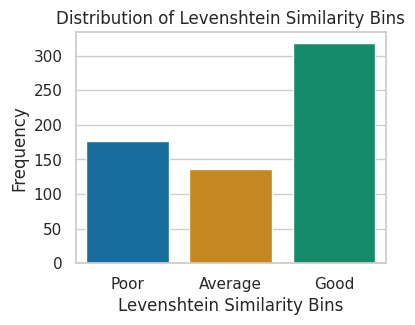

In [19]:
sns.set(style="whitegrid")

plt.figure(figsize=(4, 3))
ax = sns.countplot(x='lev_similarity_bins', data=data_sample, palette='colorblind')

plt.title('Distribution of Levenshtein Similarity Bins', fontsize=12)
plt.xlabel('Levenshtein Similarity Bins', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.xticks(rotation=0)

plt.show()


CKA is a statistical measure used to assess how similar two sets of high-dimensional data are. In the context of neural network activations, CKA helps us understand how similarly two different inputs (in your case, correct text versus OCR text) are processed across various layers of a model.

By comparing activations from correct and OCR texts across all layers, we're essentially exploring which layers of the neural network process the texts more similarly or differently. This can reveal which layers are more sensitive to OCR errors and at what point in the network the representations diverge significantly.


We might expect that initial layers (closer to the input) might show higher similarity because these layers generally capture basic features of the input text that are less affected by minor errors or distortions typical in OCR processes. Deeper layers, which capture more abstract and composite representations, might exhibit more significant differences if OCR errors alter the semantic interpretation of the text.


In [ ]:
import ecco

# Initialize the model and tokenizer
lm = ecco.from_pretrained('meta-llama/Llama-2-7b-hf', activations=True, gpu=False)
lm.tokenizer.add_special_tokens({'pad_token': '[PAD]'})
lm.model.resize_token_embeddings(len(lm.tokenizer))


In [ ]:
MAX_LENGTH = 64
BATCH_SIZE = 100 

text = 'test'

input_tokenized_info = lm.tokenizer(text, return_tensors="pt", 
                           max_length=MAX_LENGTH, padding='max_length', truncation=True)
    
input_tokenized_info

In [ ]:
output = lm(input_tokenized_info)

In [ ]:
output.activations['decoder'].shape

In [ ]:
output.activations.keys()

In [ ]:
len(output.decoder_hidden_states)

In [ ]:
output.decoder_hidden_states[0].shape

In [ ]:
stacked_activations = torch.vstack(output.decoder_hidden_states)

In [ ]:
stacked_activations.shape

In [ ]:
stacked_activations = torch.vstack(output.decoder_hidden_states)
stacked_activations.reshape(stacked_activations.shape[0], -1, stacked_activations.shape[1]).shape

In [ ]:
output.activations['decoder'].shape

In [ ]:
output.rankings_watch(watch=[318, 389], position=64)

In [ ]:
output

In [ ]:
type(output.activations['decoder'][0])

In [ ]:
type(stacked_activations.cpu().detach().numpy())

In [ ]:
output.activations['decoder'][0].shape

In [ ]:
del lm


In [ ]:
import gc
torch.cuda.empty_cache()
gc.collect()

In [ ]:
len(data_sample)

In [ ]:
import numpy as np
from ecco import analysis
from tqdm.auto import tqdm
import pandas as pd
import json
import pickle

tqdm.pandas()

MAX_LENGTH = 64
BATCH_SIZE = 100 

def get_neuron_activations(text, lm, max_length=512):
    input_tokenized_info = lm.tokenizer(text, return_tensors="pt", 
                                        max_length=max_length, padding='max_length', truncation=True)
    
    output = lm(input_tokenized_info)
    return output.activations['decoder'][0]
    # stacked_activations = torch.vstack(output.decoder_hidden_states)
    # return stacked_activations.reshape(stacked_activations.shape[0], -1, stacked_activations.shape[1]).cpu().detach().numpy()

# Define the function for calculating CKA between activations for all layers
def calculate_cka(correct_token, ocr_token, model, max_length):
    # Fetch activations for the correct token
    corrected_activations = get_neuron_activations(correct_token, model, max_length)
    
    # Fetch activations for the OCR token
    ocr_activations = get_neuron_activations(ocr_token, model, max_length)

    cka_values_per_layer = []
    mean_corrected_activations_per_layer = []
    mean_ocr_activations_per_layer = []
    var_ocr_activations_per_layer = []
    var_corrected_activations_per_layer = []
    
    all_corrected_activations = []
    all_ocr_activations = []
    
    layer_activations_corrected = {}
    layer_activations_ocr = {}
    
    # Compute CKA similarity for each layer
    for layer in range(len(corrected_activations)):
        corrected_layer_activations = corrected_activations[layer].T
        ocr_layer_activations = ocr_activations[layer].T
        
        cka_value = analysis.cka(corrected_layer_activations, ocr_layer_activations)
        cka_values_per_layer.append(float(cka_value))  # Convert to native Python float
        
        # Compute mean and variance for each layer
        mean_corrected = float(corrected_layer_activations.mean())
        mean_ocr = float(ocr_layer_activations.mean())
        var_corrected = float(corrected_layer_activations.var())
        var_ocr = float(ocr_layer_activations.var())
        
        mean_corrected_activations_per_layer.append(mean_corrected)
        mean_ocr_activations_per_layer.append(mean_ocr)
        var_corrected_activations_per_layer.append(var_corrected)
        var_ocr_activations_per_layer.append(var_ocr)
        
        all_corrected_activations.append(corrected_layer_activations)
        all_ocr_activations.append(ocr_layer_activations)
        
        layer_activations_corrected[f'layer_{layer+1}_corrected'] = corrected_layer_activations
        layer_activations_ocr[f'layer_{layer+1}_ocr'] = ocr_layer_activations

    all_corrected_activations = np.vstack(all_corrected_activations)
    all_ocr_activations = np.vstack(all_ocr_activations)
    
    overall_cka_value = float(analysis.cka(all_corrected_activations, all_ocr_activations))
    
    # Compute overall mean and variance
    overall_mean_corrected = float(all_corrected_activations.mean())
    overall_mean_ocr = float(all_ocr_activations.mean())
    overall_var_corrected = float(all_corrected_activations.var())
    overall_var_ocr = float(all_ocr_activations.var())
    
    overall_mean_activations = (overall_mean_corrected, overall_mean_ocr)
    overall_var_activations = (overall_var_corrected, overall_var_ocr)
    
    return (cka_values_per_layer, overall_cka_value, 
            mean_corrected_activations_per_layer, mean_ocr_activations_per_layer,
            var_corrected_activations_per_layer, var_ocr_activations_per_layer,
            overall_mean_corrected, overall_mean_ocr, overall_var_corrected, overall_var_ocr,
            layer_activations_corrected, layer_activations_ocr)

def process_and_save_batch(batch_df, batch_index, model='llama'):
    results = batch_df.progress_apply(
        lambda row: pd.Series(calculate_cka(row['token_correct'], row['token_ocr'], lm, MAX_LENGTH)),
        axis=1
    )
    
    batch_df.loc[:, 'cka_values_per_layer'] = results[0].apply(json.dumps)
    batch_df.loc[:, 'overall_cka_value'] = results[1]
    batch_df.loc[:, 'mean_corrected_activations_per_layer'] = results[2].apply(json.dumps)
    batch_df.loc[:, 'mean_ocr_activations_per_layer'] = results[3].apply(json.dumps)
    batch_df.loc[:, 'var_corrected_activations_per_layer'] = results[4].apply(json.dumps)
    batch_df.loc[:, 'var_ocr_activations_per_layer'] = results[5].apply(json.dumps)
    batch_df.loc[:, 'overall_mean_corrected'] = results[6]
    batch_df.loc[:, 'overall_mean_ocr'] = results[7]
    batch_df.loc[:, 'overall_var_corrected'] = results[8]
    batch_df.loc[:, 'overall_var_ocr'] = results[9]
    
    activations_corrected = results[10].tolist()
    activations_ocr = results[11].tolist()
    
    with open(f'data/activations_{model}_batch_{batch_index}.pkl', 'wb') as f:
        pickle.dump({'corrected': activations_corrected, 'ocr': activations_ocr}, f)
    
    batch_filename = f'data/data_sample_{model}_with_activations_batch_{batch_index}.csv'
    batch_df.to_csv(batch_filename, index=False)

num_batches = len(data_sample) // BATCH_SIZE + (1 if len(data_sample) % BATCH_SIZE != 0 else 0)
data_sample = data_sample.sample(frac=1)

for model in ['mistral']: #'llama', mistral
    print(f'Processing with {model}')
    import ecco, torch
    model_config = {
        'embedding': "model.embed_tokens.weight",
        'type': 'causal',
        'activations': ['mlp\.up_proj'],
        'token_prefix': '▁',
        'partial_token_prefix': ''
    }
    if 'llama' in model:
        lm = ecco.from_pretrained('meta-llama/Llama-2-7b-hf', activations=True, gpu=True)
        lm.tokenizer.add_special_tokens({'pad_token': '[PAD]'})
        lm.model.resize_token_embeddings(len(lm.tokenizer))
    elif 'mistral' in model:
        lm = ecco.from_pretrained('mistralai/Mistral-7B-v0.3', activations=True, gpu=True)
        lm.tokenizer.add_special_tokens({'pad_token': '[PAD]'})
        lm.model.resize_token_embeddings(len(lm.tokenizer))

    for i in range(num_batches):
        print(f'Processing {i+1}/{num_batches}')
        batch_start = i * BATCH_SIZE
        batch_end = min((i + 1) * BATCH_SIZE, len(data_sample))
        batch_df = data_sample.iloc[batch_start:batch_end].copy()  # Ensure a copy is made to avoid SettingWithCopyWarning
        
        process_and_save_batch(batch_df, i, model)


In [ ]:
del lm

In [ ]:
import gc, torch
torch.cuda.empty_cache()
gc.collect()

In [ ]:
len(data_sample)

In [ ]:
data_sample.head()

In [113]:
import pandas as pd
import pickle
num_batches = 3
# Load the main CSV files
data_samples = []
for model in ['llama', 'mistral']:
    dfs = []
    for i in range(num_batches): 
        print(f'Loading batch {i}')
        df = pd.read_csv(f'data/data_sample_{model}_with_activations_batch_{i}.csv')
        dfs.append(df)
    
    data_sample = pd.concat(dfs)
    print("Main data loaded. Shape:", data_sample.shape)
    
    activations_corrected = []
    activations_ocr = []
    for i in range(num_batches): 
        print(f'Loading activations batch {i}')
        with open(f'data/activations_{model}_batch_{i}.pkl', 'rb') as f:
            activations = pickle.load(f)
            activations_corrected.extend(activations['corrected'])
            activations_ocr.extend(activations['ocr'])
    
    print("Activations loaded. Length:", len(activations_corrected), len(activations_ocr))
    
    data_sample['activations_corrected'] = activations_corrected
    data_sample['activations_ocr'] = activations_ocr
    data_sample['model'] = [model] * len(data_sample)

    data_samples.append(data_sample)
    data_sample.head()

Loading batch 0
Loading batch 1
Loading batch 2
Main data loaded. Shape: (300, 16)
Loading activations batch 0
Loading activations batch 1
Loading activations batch 2
Activations loaded. Length: 300 300
Loading batch 0
Loading batch 1
Loading batch 2
Main data loaded. Shape: (300, 16)
Loading activations batch 0
Loading activations batch 1
Loading activations batch 2
Activations loaded. Length: 300 300


In [114]:
data_sample.head(1)

,token_correct,token_ocr,level,pos,lev_similarity,lev_similarity_bins,cka_values_per_layer,overall_cka_value,mean_corrected_activations_per_layer,mean_ocr_activations_per_layer,var_corrected_activations_per_layer,var_ocr_activations_per_layer,overall_mean_corrected,overall_mean_ocr,overall_var_corrected,overall_var_ocr,activations_corrected,activations_ocr,model
0,frontière,frontièke,Low,NOUN,0.888889,Good,"[0.9998726502084703, 0.9996626638053724, 0.992...",0.994411,"[0.007423365022987127, 0.012297949753701687, -...","[0.007299916818737984, 0.011346014216542244, -...","[0.17803926765918732, 0.3809976577758789, 1.85...","[0.17443989217281342, 0.37596771121025085, 1.8...",-0.000259,0.002354,4.612796,4.599305,"{'layer_1_corrected': [[-0.23203349, -0.689157...","{'layer_1_ocr': [[-0.23225805, -0.6890498, 0.2...",mistral


In [115]:
data_sample = pd.concat(data_samples)

In [116]:
len(data_sample)

600

In [117]:
# Update the 'Model Type' column
# data_sample['lev_similarity_bins'] = df['lev_similarity_bins'].replace({
#     'Good': 'Low',
#     'Average': 'Average',
#     'Poor': 'High',
# })

In [118]:
data_sample.columns

Index(['token_correct', 'token_ocr', 'level', 'pos', 'lev_similarity',
       'lev_similarity_bins', 'cka_values_per_layer', 'overall_cka_value',
       'mean_corrected_activations_per_layer',
       'mean_ocr_activations_per_layer', 'var_corrected_activations_per_layer',
       'var_ocr_activations_per_layer', 'overall_mean_corrected',
       'overall_mean_ocr', 'overall_var_corrected', 'overall_var_ocr',
       'activations_corrected', 'activations_ocr', 'model'],
      dtype='object')

In [119]:
len(data_sample)

600

In [120]:
data_sample.head(1)

,token_correct,token_ocr,level,pos,lev_similarity,lev_similarity_bins,cka_values_per_layer,overall_cka_value,mean_corrected_activations_per_layer,mean_ocr_activations_per_layer,var_corrected_activations_per_layer,var_ocr_activations_per_layer,overall_mean_corrected,overall_mean_ocr,overall_var_corrected,overall_var_ocr,activations_corrected,activations_ocr,model
0,DÉPUTÉS,OÉPUTÉS,Low,NOUN,0.857143,Good,"[0.9918162458801597, 0.9999996346424292, 0.587...",0.909363,"[-3.317127266200259e-05, 0.0006228195270523429...","[-3.846714025712572e-05, 0.000526949530467391,...","[0.00010283978190273046, 0.2792325019836426, 0...","[9.119418245973065e-05, 0.27763745188713074, 0...",0.000132,0.000017,0.028879,0.029911,"{'layer_1_corrected': [[0.00078715914, 0.00393...","{'layer_1_ocr': [[0.00078715914, 0.0039315145,...",llama


In [121]:
import pandas as pd

# Calculate mean and median CKA values grouped by noise level and Levenshtein similarity bins
grouped_stats = data_sample.groupby(['level', 'lev_similarity_bins', 'model'])['overall_cka_value'].agg(['mean', 'median'])

print(grouped_stats)


                                        mean    median
level  lev_similarity_bins model                      
High   Average             llama    0.722688  0.729709
                           mistral  0.985418  0.984506
       Good                llama    0.881032  0.885208
                           mistral  0.995721  0.997347
       Poor                llama    0.779503  0.795252
                           mistral  0.981592  0.985899
Low    Average             llama    0.844685  0.873390
                           mistral  0.995548  0.996009
       Good                llama    0.865974  0.887887
                           mistral  0.994455  0.995979
Medium Average             llama    0.768384  0.769700
                           mistral  0.986378  0.989281
       Good                llama    0.872676  0.887401
                           mistral  0.995746  0.996742
       Poor                llama    0.758053  0.776235
                           mistral  0.981266  0.984186


In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

expanded_data = []

for _, row in data_sample.iterrows():
    for layer, cka in enumerate(eval(row['cka_values_per_layer'])):
        model = row['model'][0].upper() + row['model'][1:]
        if model == 'Llama':
            model = 'Llama 2'
        expanded_data.append({
            'Layer': layer,
            'CKA Value': cka,
            'Levenshtein Bin': row['lev_similarity_bins'],
            'Model': model
        })

layered_data = pd.DataFrame(expanded_data)

layered_data.tail()


       Layer  CKA Value Levenshtein Bin    Model
19195     27   0.995486            Good  Mistral
19196     28   0.994297            Good  Mistral
19197     29   0.992573            Good  Mistral
19198     30   0.990780            Good  Mistral
19199     31   0.989014            Good  Mistral


In [123]:
len(layered_data), len(data_sample)

(19200, 600)

In [124]:
def update_model(row):
    model = row['model'][0].upper() + row['model'][1:]
    if model == 'Llama':
        model = 'Llama 2'
    return model

data_sample['model'] = data_sample.apply(update_model, axis=1)


In [125]:
layered_data['Model'].unique()

array(['Llama 2', 'Mistral'], dtype=object)

In [126]:
# sns.set(style="whitegrid")

# g = sns.catplot(
#     data=layered_data,
#     x='Levenshtein Bin', 
#     y='CKA Value',
#     col='Layer',  # Creates a separate plot for each layer
#     kind='violin',  # Use violin plot to show the distribution
#     col_wrap=5,  # Wrap the columns every 5 plots
#     height=4, aspect=1,  # Size and shape of each plot
#     sharey=True,  # Share Y axis among all facets
#     palette=sns.color_palette("colorblind")  # Ensuring the plot is colorblind-friendly
# )

# # Add titles and labels
# g.fig.suptitle('CKA Value Distribution by Binned Levenshtein Similarity and Layer', size=16, y=1.05)
# g.set_titles('Layer {col_name}')
# g.set_axis_labels('Binned Levenshtein Similarity', 'CKA Value')
# g.set_xticklabels(rotation=45)  # Rotate x labels for better visibility

# # Adjust layout and spacing
# plt.tight_layout()
# plt.subplots_adjust(top=0.9)  # Adjust the top of the subplots to fit the suptitle

# # Show the plot
# plt.show()


First (Lower) Layers
Definition: These are the layers closest to the input data. In a typical neural network architecture, these are the layers that first receive the raw data.
Characteristics: The first layers often perform more general functions by detecting basic features in the input data such as edges in images (in the case of CNNs) or basic syntactic structures in text (in NLP applications). These features are usually not very specific to the particularities of the data's higher-level context.
Purpose: The aim of these layers is to transform raw data into a format that deeper layers can use to abstract higher-level features.

Middle Layers
Definition: These layers are situated between the early and last layers, forming the core of the network.
Characteristics: Middle layers typically extract more complex features from the simple patterns recognized by the first layers. For example, in CNNs, these layers might detect parts of objects like eyes or wheels, combining the edges and textures identified by earlier layers.
Purpose: They begin to integrate and contextualize the basic features into more complex representations that are more abstract than those detected by the first layers.

Last (Upper) Layers
Definition: These are the final layers before the output layer in a neural network. In models like CNNs, these are often fully connected layers that precede the classification layer.
Characteristics: Last layers synthesize the high-level, abstract features extracted by middle layers into even more integrated representations that are directly useful for making predictions or decisions.
Purpose: These layers typically perform high-level reasoning based on the comprehensive feature set developed by previous layers. For instance, in a CNN used for image classification, these layers would identify complex objects or scenes as a whole from the components recognized by middle layers.

In [127]:
def categorize_layer(layer):
    if int(layer) <= 10:
        return 'First Layers'
    elif int(layer) <= 20:
        return 'Middle Layers'
    else:
        return 'Last Layers'

layered_data['Layer Category'] = layered_data['Layer'].apply(categorize_layer)


In [128]:
layered_data

,Layer,CKA Value,Levenshtein Bin,Model,Layer Category
0,0,0.991816,Good,Llama 2,First Layers
1,1,1.000000,Good,Llama 2,First Layers
2,2,0.587851,Good,Llama 2,First Layers
3,3,0.515935,Good,Llama 2,First Layers
4,4,0.540031,Good,Llama 2,First Layers
...,...,...,...,...,...
19195,27,0.995486,Good,Mistral,Last Layers
19196,28,0.994297,Good,Mistral,Last Layers
19197,29,0.992573,Good,Mistral,Last Layers
19198,30,0.990780,Good,Mistral,Last Layers


In [129]:
data_sample.head(1)

,token_correct,token_ocr,level,pos,lev_similarity,lev_similarity_bins,cka_values_per_layer,overall_cka_value,mean_corrected_activations_per_layer,mean_ocr_activations_per_layer,var_corrected_activations_per_layer,var_ocr_activations_per_layer,overall_mean_corrected,overall_mean_ocr,overall_var_corrected,overall_var_ocr,activations_corrected,activations_ocr,model
0,DÉPUTÉS,OÉPUTÉS,Low,NOUN,0.857143,Good,"[0.9918162458801597, 0.9999996346424292, 0.587...",0.909363,"[-3.317127266200259e-05, 0.0006228195270523429...","[-3.846714025712572e-05, 0.000526949530467391,...","[0.00010283978190273046, 0.2792325019836426, 0...","[9.119418245973065e-05, 0.27763745188713074, 0...",0.000132,0.000017,0.028879,0.029911,"{'layer_1_corrected': [[0.00078715914, 0.00393...","{'layer_1_ocr': [[0.00078715914, 0.0039315145,...",Llama 2


In [130]:
layered_data

,Layer,CKA Value,Levenshtein Bin,Model,Layer Category
0,0,0.991816,Good,Llama 2,First Layers
1,1,1.000000,Good,Llama 2,First Layers
2,2,0.587851,Good,Llama 2,First Layers
3,3,0.515935,Good,Llama 2,First Layers
4,4,0.540031,Good,Llama 2,First Layers
...,...,...,...,...,...
19195,27,0.995486,Good,Mistral,Last Layers
19196,28,0.994297,Good,Mistral,Last Layers
19197,29,0.992573,Good,Mistral,Last Layers
19198,30,0.990780,Good,Mistral,Last Layers


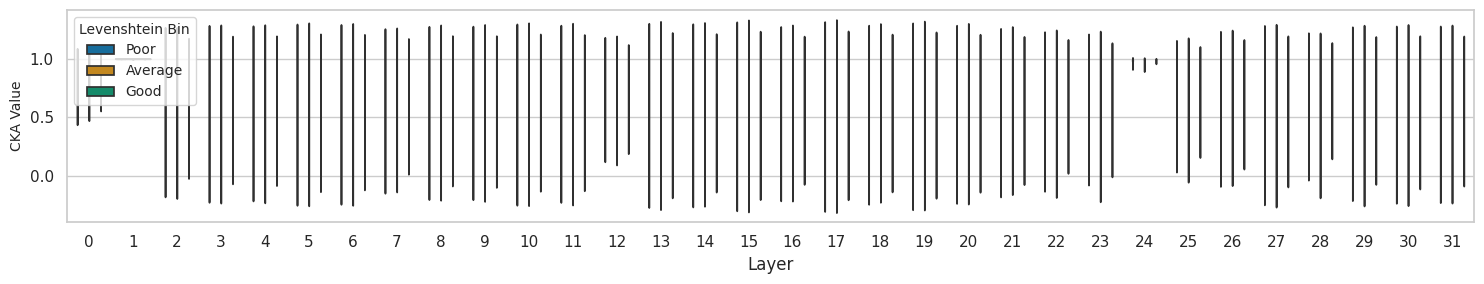

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
lev_bins_order = ['Poor', 'Average', 'Good']
layered_data['Levenshtein Bin'] = pd.Categorical(layered_data['Levenshtein Bin'], categories=lev_bins_order, ordered=True)

plt.figure(figsize=(15, 3))
ax = sns.violinplot(
    data=layered_data,
    x='Layer', 
    y='CKA Value',
    hue='Levenshtein Bin',  # Optionally differentiate by Levenshtein bins
    inner='quartile',  # Display quartiles within each violin
    palette='colorblind',  # Use a colorblind-friendly palette
#     split=True  # Display half-violins for each Levenshtein bin side by side within each category
)

# plt.title('CKA Value Distribution by Layer Category and Binned Levenshtein Similarity', fontsize=16)
# plt.xlabel('Layer Category', fontsize=14)
plt.ylabel('CKA Value', fontsize=10)

plt.legend(title='Levenshtein Bin', title_fontsize='10', fontsize='10', loc='upper left')

plt.tight_layout()
plt.show()


In [132]:
data_sample.head(1)

,token_correct,token_ocr,level,pos,lev_similarity,lev_similarity_bins,cka_values_per_layer,overall_cka_value,mean_corrected_activations_per_layer,mean_ocr_activations_per_layer,var_corrected_activations_per_layer,var_ocr_activations_per_layer,overall_mean_corrected,overall_mean_ocr,overall_var_corrected,overall_var_ocr,activations_corrected,activations_ocr,model
0,DÉPUTÉS,OÉPUTÉS,Low,NOUN,0.857143,Good,"[0.9918162458801597, 0.9999996346424292, 0.587...",0.909363,"[-3.317127266200259e-05, 0.0006228195270523429...","[-3.846714025712572e-05, 0.000526949530467391,...","[0.00010283978190273046, 0.2792325019836426, 0...","[9.119418245973065e-05, 0.27763745188713074, 0...",0.000132,0.000017,0.028879,0.029911,"{'layer_1_corrected': [[0.00078715914, 0.00393...","{'layer_1_ocr': [[0.00078715914, 0.0039315145,...",Llama 2


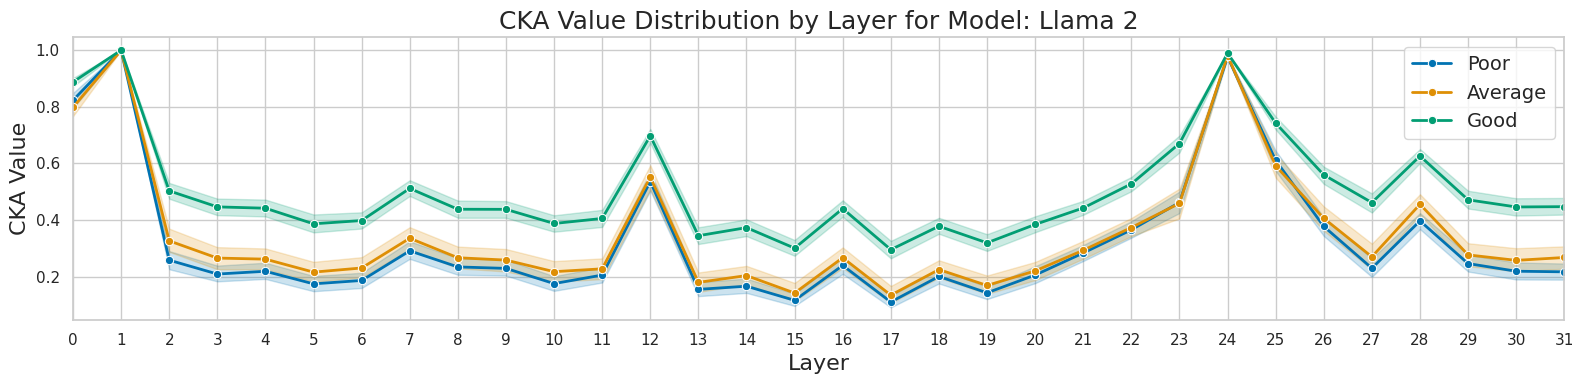

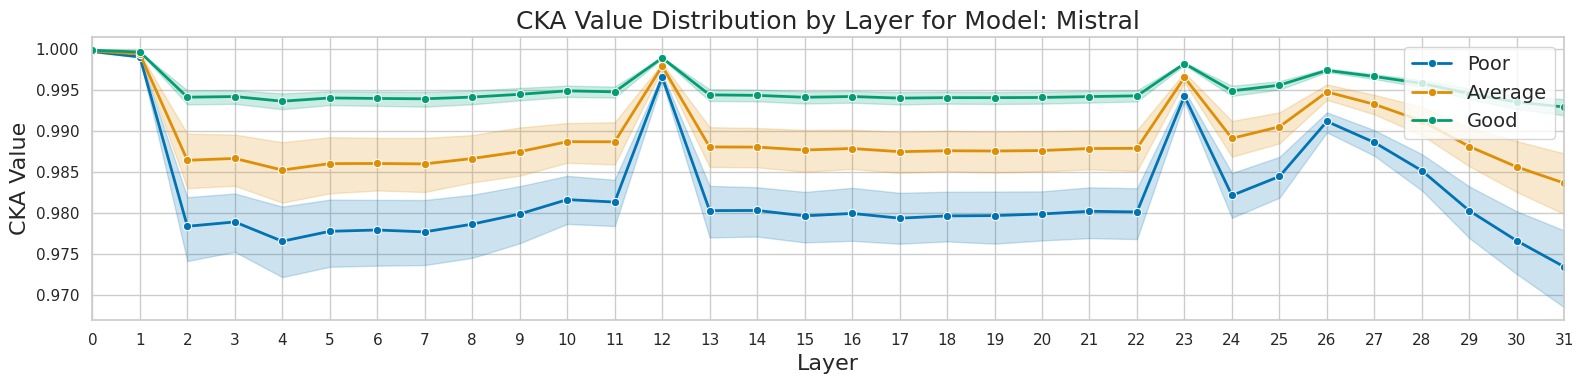

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

for model in layered_data['Model'].unique():
    color_palette = sns.color_palette("colorblind", len(lev_bins_order))
    
    plt.figure(figsize=(16, 4))  # Width set to 16 for better fit
    ax = sns.lineplot(
        data=layered_data[layered_data.Model == model],
        x='Layer',  # Use Layer on the x-axis
        y='CKA Value',
        hue='Levenshtein Bin',  # Show all Levenshtein Bin categories in the same plot
        palette=color_palette,  # Ensuring the plot is colorblind-friendly with the correct number of colors
        marker='o',  # Adding markers for each data point
        linewidth=2  # Line width for better visibility
    )

    ax.set_xticks(sorted(layered_data['Layer'].unique()))
    ax.set_xlim(0, 31)  # Set the x-axis limits to start at 0 and end at 31

    plt.xlabel('Layer', fontsize=16)
    plt.ylabel('CKA Value', fontsize=16)
    plt.title(f'CKA Value Distribution by Layer for Model: {model}', fontsize=18)
    
    ax.legend(loc='upper right', fontsize=14)

    plt.tight_layout() 
    plt.show()


In [134]:
import numpy as np
import pandas as pd
from tqdm import tqdm

# Assuming activations_corrected and activations_ocr are stored as dictionaries in the DataFrame
def compute_mean_variance(activations):
    means = {}
    variances = {}
    for layer, layer_activations in activations.items():
        layer_activations = np.array(layer_activations)
        means[layer] = layer_activations.mean(axis=0)
        variances[layer] = layer_activations.var(axis=0)
    return means, variances
tqdm.pandas()


In [135]:
tqdm.pandas()

data_sample['mean_corrected'] = None
data_sample['var_corrected'] = None
data_sample['mean_ocr'] = None
data_sample['var_ocr'] = None

for model in tqdm(data_sample.model.unique()):
    data_model = data_sample[data_sample.model == model]
    
    mean_corrected, var_corrected = zip(*data_model['activations_corrected'].progress_apply(compute_mean_variance))
    mean_ocr, var_ocr = zip(*data_model['activations_ocr'].progress_apply(compute_mean_variance))
    
    data_sample.loc[data_sample.model == model, 'mean_corrected'] = mean_corrected
    data_sample.loc[data_sample.model == model, 'var_corrected'] = var_corrected
    data_sample.loc[data_sample.model == model, 'mean_ocr'] = mean_ocr
    data_sample.loc[data_sample.model == model, 'var_ocr'] = var_ocr


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [00:18<00:00, 15.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [00:07<00:00, 41.24it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:52<00:00, 26.15s/it]


In [136]:
data_sample.head(5)

,token_correct,token_ocr,level,pos,lev_similarity,lev_similarity_bins,cka_values_per_layer,overall_cka_value,mean_corrected_activations_per_layer,mean_ocr_activations_per_layer,...,overall_mean_ocr,overall_var_corrected,overall_var_ocr,activations_corrected,activations_ocr,model,mean_corrected,var_corrected,mean_ocr,var_ocr
0,DÉPUTÉS,OÉPUTÉS,Low,NOUN,0.857143,Good,"[0.9918162458801597, 0.9999996346424292, 0.587...",0.909363,"[-3.317127266200259e-05, 0.0006228195270523429...","[-3.846714025712572e-05, 0.000526949530467391,...",...,0.000017,0.028879,0.029911,"{'layer_1_corrected': [[0.00078715914, 0.00393...","{'layer_1_ocr': [[0.00078715914, 0.0039315145,...",Llama 2,"{'layer_1_corrected': [0.0028795537, 0.0028543...","{'layer_1_corrected': [9.556827e-07, 9.830316e...","{'layer_1_ocr': [0.0038005447, 0.0029168904, -...","{'layer_1_ocr': [1.6309257e-06, 9.662909e-07, ..."
1,discussion,di8co88i0n,High,NOUN,0.500000,Poor,"[0.5249605000162504, 0.9999988649930579, 0.102...",0.593901,"[-7.283091690624133e-05, 0.000667407875880599,...","[2.6293548671674216e-06, 0.000626418914180249,...",...,-0.000096,0.024673,0.038243,"{'layer_1_corrected': [[0.00078715914, 0.00393...","{'layer_1_ocr': [[0.00078715914, 0.0039315145,...",Llama 2,"{'layer_1_corrected': [-0.0018625496, 0.003268...","{'layer_1_corrected': [1.5749696e-07, 1.936528...","{'layer_1_ocr': [-0.0007694722, 0.0014219892, ...","{'layer_1_ocr': [7.821439e-07, 2.775512e-07, 4..."
2,assurance,a88okance,High,NOUN,0.555556,Poor,"[0.7315951094429481, 0.9996174605860627, 0.148...",0.786997,"[-7.135629857657477e-05, 0.0005723022040911019...","[-3.117693631793372e-05, 0.0013549437280744314...",...,0.000061,0.024918,0.054299,"{'layer_1_corrected': [[0.00078715914, 0.00393...","{'layer_1_ocr': [[0.00078715914, 0.0039315145,...",Llama 2,"{'layer_1_corrected': [-0.0010468024, 0.005703...","{'layer_1_corrected': [1.5304569e-07, 1.356709...","{'layer_1_ocr': [-0.0010363031, 0.00079873926,...","{'layer_1_ocr': [4.544107e-07, 2.3563341e-07, ..."
3,Dimanche,Oimanche,Low,NOUN,0.875000,Good,"[0.9076457057556799, 0.9999999342219184, 0.541...",0.936772,"[-6.323886918835342e-05, 0.0005802406230941415...","[-3.617373658926226e-05, 0.0004801113973371684...",...,-0.000046,0.026699,0.025173,"{'layer_1_corrected': [[0.00078715914, 0.00393...","{'layer_1_ocr': [[0.00078715914, 0.0039315145,...",Llama 2,"{'layer_1_corrected': [0.0020855253, 4.316438e...","{'layer_1_corrected': [7.058293e-07, 2.9746988...","{'layer_1_ocr': [0.002624487, 0.0013461199, 0....","{'layer_1_ocr': [2.4417542e-07, 1.7110723e-07,..."
4,prévoyance,pkévoyance,Low,NOUN,0.900000,Good,"[0.9427168578751657, 0.9999999268461998, 0.409...",0.816546,"[-3.6421737604541704e-05, 0.000552183948457241...","[-2.724785008467734e-05, 0.0005171949742361903...",...,-0.000074,0.027429,0.034900,"{'layer_1_corrected': [[0.00078715914, 0.00393...","{'layer_1_ocr': [[0.00078715914, 0.0039315145,...",Llama 2,"{'layer_1_corrected': [-0.0016074027, 0.007000...","{'layer_1_corrected': [2.843185e-07, 2.4019155...","{'layer_1_ocr': [0.0010493447, 0.0017747298, -...","{'layer_1_ocr': [7.515507e-08, 3.8802224e-07, ..."


In [137]:
data_sample['mean_ocr']

0     {'layer_1_ocr': [0.0038005447, 0.0029168904, -...
1     {'layer_1_ocr': [-0.0007694722, 0.0014219892, ...
2     {'layer_1_ocr': [-0.0010363031, 0.00079873926,...
3     {'layer_1_ocr': [0.002624487, 0.0013461199, 0....
4     {'layer_1_ocr': [0.0010493447, 0.0017747298, -...
                            ...                        
95    {'layer_1_ocr': [-0.2136068, -0.63220614, 0.19...
96    {'layer_1_ocr': [-0.22386606, -0.6448639, 0.20...
97    {'layer_1_ocr': [-0.20891277, -0.62918764, 0.2...
98    {'layer_1_ocr': [-0.21743657, -0.6406189, 0.19...
99    {'layer_1_ocr': [-0.22116306, -0.63224936, 0.2...
Name: mean_ocr, Length: 600, dtype: object

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tqdm import tqdm

threshold = 0.05
layers = []
bins = []
mean_diffs = []
var_diffs = []
cka_values = []
models = []

# Calculate mean and variance differences between corrected and OCR activations
for index, row in tqdm(data_sample.iterrows(), total=len(data_sample)):
    for i, layer in enumerate(row['mean_corrected'].keys()):
        
        mean_diff = np.abs(row['mean_corrected'][layer] - row['mean_ocr'][layer.replace('corrected', 'ocr')])
        var_diff = np.abs(row['var_corrected'][layer] - row['var_ocr'][layer.replace('corrected', 'ocr')])
        layers.append(int(layer.split('_')[1])-1)
        bins.append(row['lev_similarity_bins'])
        mean_diffs.append(mean_diff.mean())  
        # mean of differences across neurons in the layer
        var_diffs.append(var_diff.mean())
        cka_value = eval(row['cka_values_per_layer'])[i]
        cka_values.append(cka_value)
        models.append(row['model'])

mean_var_diff_df = pd.DataFrame({
    'Layer': layers,
    'Levenshtein Bin': bins,
    'Mean Difference': mean_diffs,
    'Variance Difference': var_diffs,
    'CKA Value': cka_values,
    'Model': models
})



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 204.51it/s]


In [139]:
mean_var_diff_df.columns

Index(['Layer', 'Levenshtein Bin', 'Mean Difference', 'Variance Difference',
       'CKA Value', 'Model'],
      dtype='object')

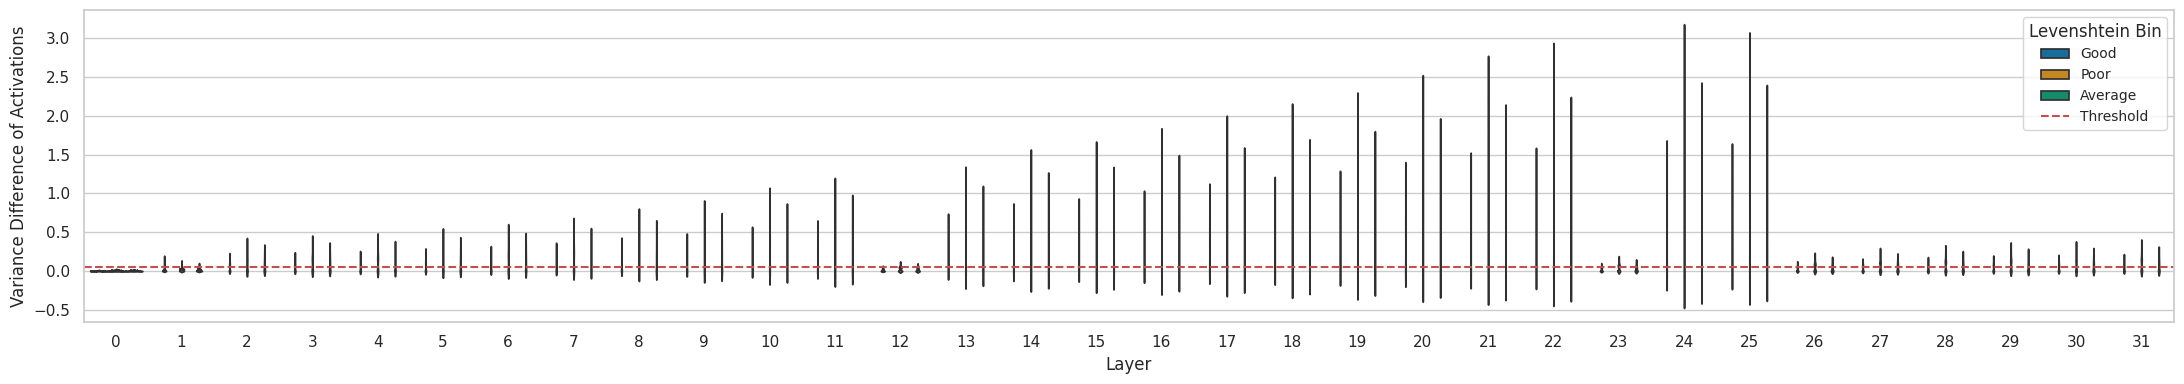

In [140]:

plt.figure(figsize=(22, 4))
sns.violinplot(
    data=mean_var_diff_df,
    x='Layer',
    y='Variance Difference',
    hue='Levenshtein Bin',
    inner='quartile',  # Show quartiles within the violin plot
    palette='colorblind'  # Use a colorblind-friendly palette
)

plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('Layer', fontsize=12)
plt.ylabel('Variance Difference of Activations', fontsize=12)
# plt.title('OCR-Sensitive Neurons Across Layers', fontsize=14)
plt.legend(title='Levenshtein Bin', title_fontsize='12', fontsize='10', loc='upper right')

plt.tight_layout()
plt.show()

In [141]:
# Adjust layer indices to start from 0
# mean_var_diff_df['Layer'] = mean_var_diff_df['Layer'] - 1

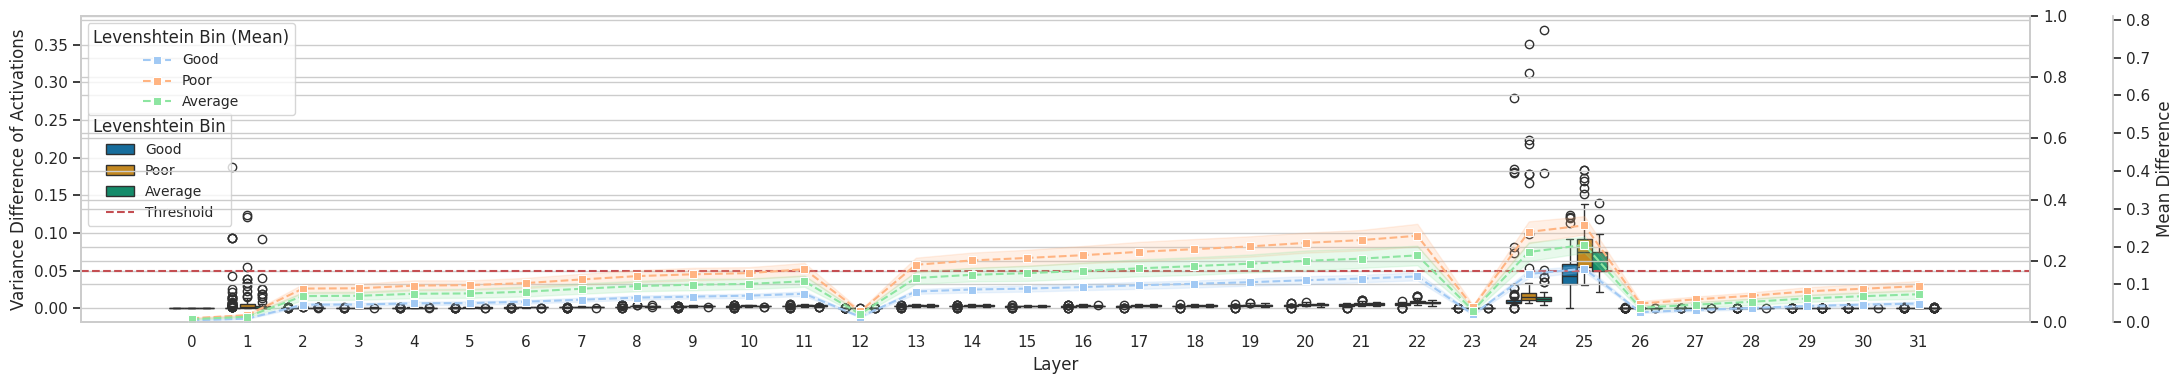

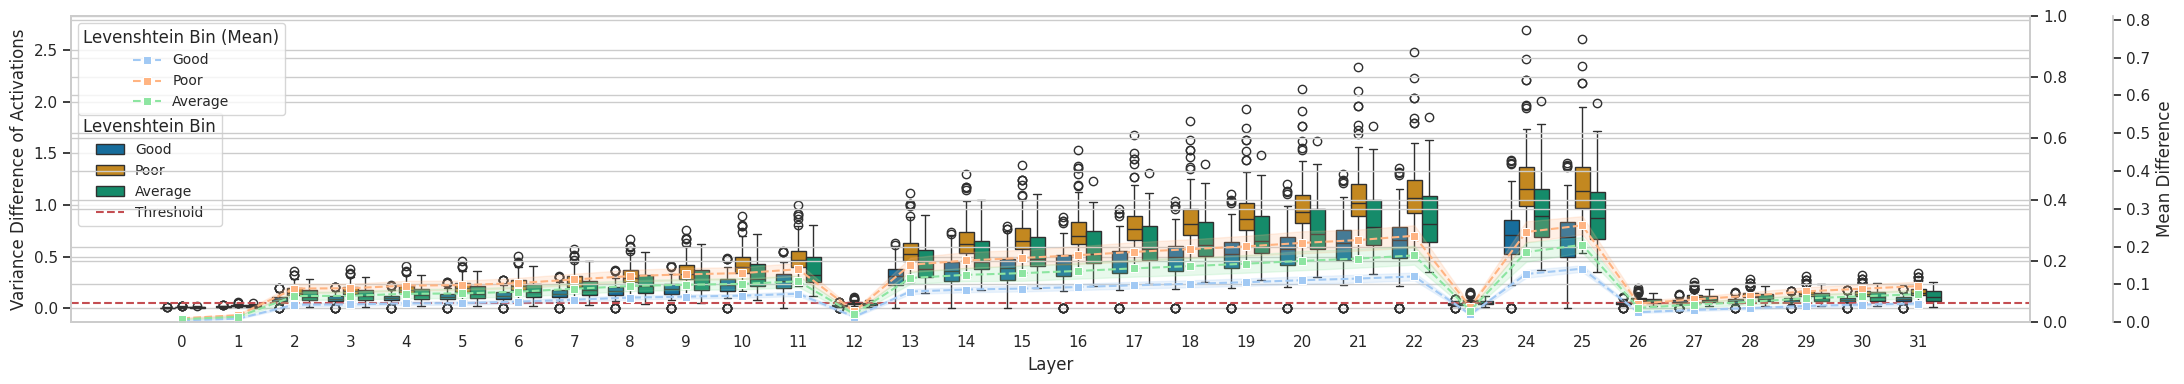

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

for model in mean_var_diff_df.Model.unique():
    fig, ax1 = plt.subplots(figsize=(22, 4))
    
    sns.boxplot(
        data=mean_var_diff_df[mean_var_diff_df.Model == model],
        x='Layer',
        y='Variance Difference',
        hue='Levenshtein Bin',
        palette='colorblind',
        ax=ax1
    )
    ax1.axhline(y=0.05, color='r', linestyle='--', label='Threshold')  # Example threshold
    ax1.set_xlabel('Layer', fontsize=12)
    ax1.set_ylabel('Variance Difference of Activations', fontsize=12)
    ax1.legend(title='Levenshtein Bin', title_fontsize='12', fontsize='10', loc='center left')
    
    # Highlighting sensitive layers with vertical shaded regions
    # sensitive_layers = [(0, 3), (6, 10), (12, 13), (15, 17), (24, 26), (27, 29)]  # Adjusted ranges to include 27-29
    # for start, end in sensitive_layers:
    #     ax1.axvspan(start, end, color='yellow', alpha=0.3)
    
    # Create a second y-axis for CKA values
    ax2 = ax1.twinx()
    
    # Ensure we only plot unique values for the lineplot
    unique_cka_df = mean_var_diff_df[mean_var_diff_df.Model == model][['Layer', 'Levenshtein Bin', 'CKA Value']].drop_duplicates()
    
    # sns.lineplot(
    #     data=unique_cka_df,
    #     x='Layer',
    #     y='CKA Value',
    #     hue='Levenshtein Bin',
    #     palette='dark',
    #     ax=ax2,
    #     marker='o',
    #     linestyle='-'
    # )
    # ax2.set_ylabel('CKA Value', fontsize=12)
    # ax2.set_ylim(0, 1)  # Set the y-axis limit for CKA values for better visualization
    # ax2.legend(title='Levenshtein Bin (CKA)', title_fontsize='12', fontsize='10', loc='upper right')
    
    ax3 = ax1.twinx()
    ax3.spines['right'].set_position(('outward', 60))  # Offset the third axis
    
    sns.lineplot(
        data=mean_var_diff_df,
        x='Layer',
        y='Mean Difference',
        hue='Levenshtein Bin',
        palette='pastel',
        ax=ax3,
        marker='s',
        linestyle='--'
    )
    ax3.set_ylabel('Mean Difference', fontsize=12)
    ax3.set_ylim(0, mean_var_diff_df['Mean Difference'].max())  # Adjust y-axis limit for better visualization
    ax3.legend(title='Levenshtein Bin (Mean)', title_fontsize='12', fontsize='10', loc='upper left')
    
    plt.tight_layout()
    plt.show()


In [143]:
# 0, 1, 2, 22, 

In [164]:
mean_var_diff_df.head(1)

,Layer,Levenshtein Bin,Mean Difference,Variance Difference,CKA Value,Model,Common Sensitive Neuron Count
0,0,Good,0.000363,0.000003,0.991816,Llama 2,12


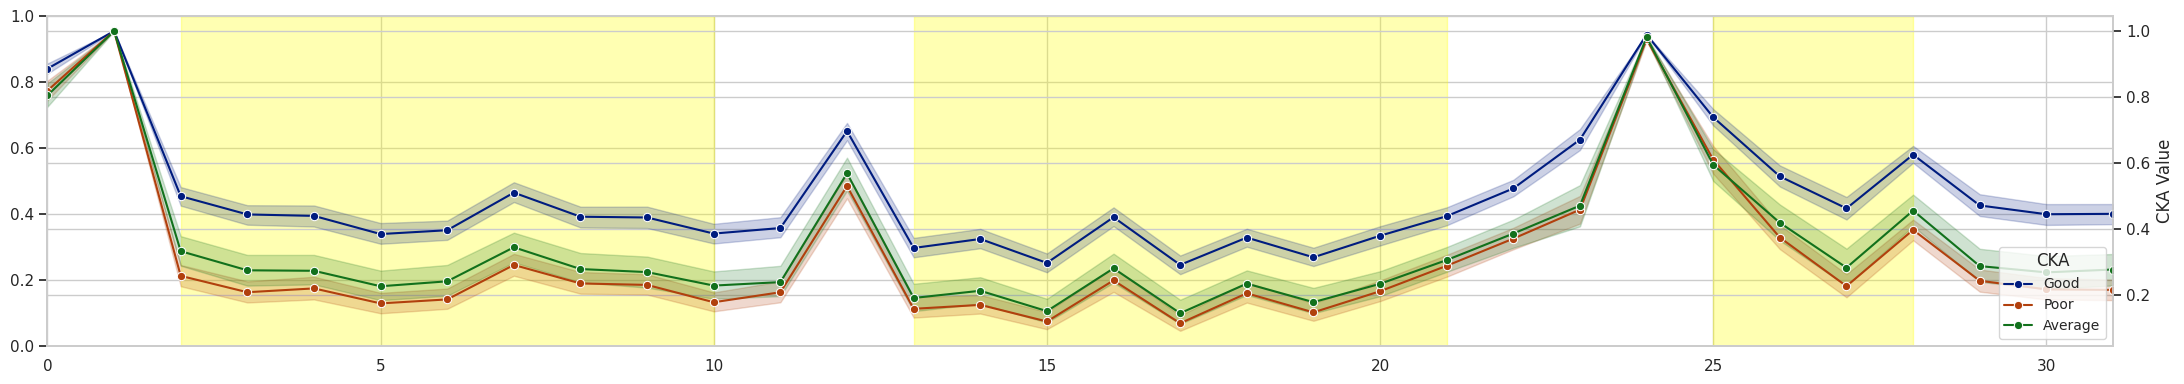

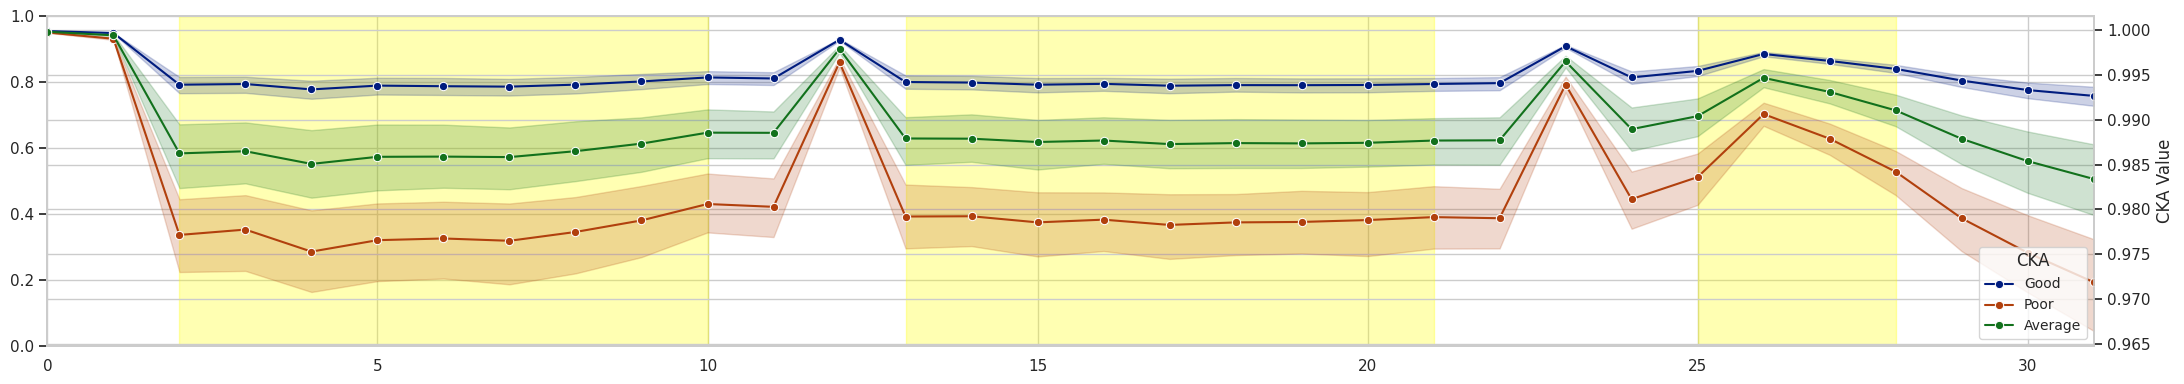

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

ocr_sensitive_layers = [(2, 10), (13, 21), (25, 28)]

for model in mean_var_diff_df.Model.unique():
    fig, ax1 = plt.subplots(figsize=(22, 4))
    
    for (start, end) in ocr_sensitive_layers:
        ax1.axvspan(start, end, color='yellow', alpha=0.3)
    
    # sns.lineplot(
    #     data=mean_var_diff_df[mean_var_diff_df.Model == model],
    #     x='Layer',
    #     y='Variance Difference',
    #     hue='Levenshtein Bin',
    #     palette='colorblind',
    #     ax=ax1,
    #     marker='^',
    #     linestyle='-'
    # )
    # # ax1.axhline(y=0.05, color='r', linestyle='--', label='Threshold')  # Example threshold
    # ax1.set_xlabel('Layer', fontsize=12)
    # ax1.set_ylabel('Variance Difference of Activations', fontsize=12)
    # ax1.set_xlim(0, 31)  # Set the x-axis limit to start at 0 and end at 31
    # ax1.legend(title='Variance', title_fontsize='12', fontsize='10', loc='upper right')
    
    ax2 = ax1.twinx()
    
    unique_cka_df = mean_var_diff_df[mean_var_diff_df.Model == model][['Layer', 'Levenshtein Bin', 'CKA Value']].drop_duplicates()
    
    sns.lineplot(
        data=unique_cka_df,
        x='Layer',
        y='CKA Value',
        hue='Levenshtein Bin',
        palette='dark',
        ax=ax2,
        marker='o',
        linestyle='-'
    )
    ax2.set_ylabel('CKA Value', fontsize=12)
    # ax2.set_ylim(0, 1)  # Set the y-axis limit for CKA values for better visualization
    ax2.set_xlim(0, 31)  # Set the x-axis limit to start at 0 and end at 31
    ax2.legend(title='CKA', title_fontsize='12', fontsize='10', loc='lower right')
    
    # ax3 = ax1.twinx()
    # ax3.spines['right'].set_position(('outward', 60))  # Offset the third axis
    
    # sns.lineplot(
    #     data=mean_var_diff_df,
    #     x='Layer',
    #     y='Mean Difference',
    #     hue='Levenshtein Bin',
    #     palette='colorblind',
    #     ax=ax3,
    #     marker='s',
    #     linestyle='--'
    # )
    # ax3.set_ylabel('Mean Difference', fontsize=12)
    # ax3.set_ylim(0, mean_var_diff_df['Mean Difference'].max())  # Adjust y-axis limit for better visualization
    # ax3.set_xlim(0, 31)  # Set the x-axis limit to start at 0 and end at 31
    # ax3.legend(title='Mean', title_fontsize='12', fontsize='10', loc='center right')
    
    plt.tight_layout()
    plt.show()
    

In [145]:
data_sample.head()

,token_correct,token_ocr,level,pos,lev_similarity,lev_similarity_bins,cka_values_per_layer,overall_cka_value,mean_corrected_activations_per_layer,mean_ocr_activations_per_layer,...,overall_mean_ocr,overall_var_corrected,overall_var_ocr,activations_corrected,activations_ocr,model,mean_corrected,var_corrected,mean_ocr,var_ocr
0,DÉPUTÉS,OÉPUTÉS,Low,NOUN,0.857143,Good,"[0.9918162458801597, 0.9999996346424292, 0.587...",0.909363,"[-3.317127266200259e-05, 0.0006228195270523429...","[-3.846714025712572e-05, 0.000526949530467391,...",...,0.000017,0.028879,0.029911,"{'layer_1_corrected': [[0.00078715914, 0.00393...","{'layer_1_ocr': [[0.00078715914, 0.0039315145,...",Llama 2,"{'layer_1_corrected': [0.0028795537, 0.0028543...","{'layer_1_corrected': [9.556827e-07, 9.830316e...","{'layer_1_ocr': [0.0038005447, 0.0029168904, -...","{'layer_1_ocr': [1.6309257e-06, 9.662909e-07, ..."
1,discussion,di8co88i0n,High,NOUN,0.500000,Poor,"[0.5249605000162504, 0.9999988649930579, 0.102...",0.593901,"[-7.283091690624133e-05, 0.000667407875880599,...","[2.6293548671674216e-06, 0.000626418914180249,...",...,-0.000096,0.024673,0.038243,"{'layer_1_corrected': [[0.00078715914, 0.00393...","{'layer_1_ocr': [[0.00078715914, 0.0039315145,...",Llama 2,"{'layer_1_corrected': [-0.0018625496, 0.003268...","{'layer_1_corrected': [1.5749696e-07, 1.936528...","{'layer_1_ocr': [-0.0007694722, 0.0014219892, ...","{'layer_1_ocr': [7.821439e-07, 2.775512e-07, 4..."
2,assurance,a88okance,High,NOUN,0.555556,Poor,"[0.7315951094429481, 0.9996174605860627, 0.148...",0.786997,"[-7.135629857657477e-05, 0.0005723022040911019...","[-3.117693631793372e-05, 0.0013549437280744314...",...,0.000061,0.024918,0.054299,"{'layer_1_corrected': [[0.00078715914, 0.00393...","{'layer_1_ocr': [[0.00078715914, 0.0039315145,...",Llama 2,"{'layer_1_corrected': [-0.0010468024, 0.005703...","{'layer_1_corrected': [1.5304569e-07, 1.356709...","{'layer_1_ocr': [-0.0010363031, 0.00079873926,...","{'layer_1_ocr': [4.544107e-07, 2.3563341e-07, ..."
3,Dimanche,Oimanche,Low,NOUN,0.875000,Good,"[0.9076457057556799, 0.9999999342219184, 0.541...",0.936772,"[-6.323886918835342e-05, 0.0005802406230941415...","[-3.617373658926226e-05, 0.0004801113973371684...",...,-0.000046,0.026699,0.025173,"{'layer_1_corrected': [[0.00078715914, 0.00393...","{'layer_1_ocr': [[0.00078715914, 0.0039315145,...",Llama 2,"{'layer_1_corrected': [0.0020855253, 4.316438e...","{'layer_1_corrected': [7.058293e-07, 2.9746988...","{'layer_1_ocr': [0.002624487, 0.0013461199, 0....","{'layer_1_ocr': [2.4417542e-07, 1.7110723e-07,..."
4,prévoyance,pkévoyance,Low,NOUN,0.900000,Good,"[0.9427168578751657, 0.9999999268461998, 0.409...",0.816546,"[-3.6421737604541704e-05, 0.000552183948457241...","[-2.724785008467734e-05, 0.0005171949742361903...",...,-0.000074,0.027429,0.034900,"{'layer_1_corrected': [[0.00078715914, 0.00393...","{'layer_1_ocr': [[0.00078715914, 0.0039315145,...",Llama 2,"{'layer_1_corrected': [-0.0016074027, 0.007000...","{'layer_1_corrected': [2.843185e-07, 2.4019155...","{'layer_1_ocr': [0.0010493447, 0.0017747298, -...","{'layer_1_ocr': [7.515507e-08, 3.8802224e-07, ..."


In [146]:
import numpy as np
from tqdm.auto import tqdm
import pandas as pd

def identify_sensitive_neurons(mean_corrected, mean_ocr):
    sensitive_neurons = {}
    for layer in mean_corrected.keys():
        diff = np.abs(mean_corrected[layer] - mean_ocr[layer.replace('corrected', 'ocr')])
        mean_diff = diff.mean()
        std_diff = diff.std()
        sensitive_neurons[layer] = np.where(diff > mean_diff + std_diff)[0]
    return sensitive_neurons

tqdm.pandas()
data_sample['sensitive_neurons'] = data_sample.progress_apply(
    lambda row: identify_sensitive_neurons(row['mean_corrected'], row['mean_ocr']),
    axis=1
)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:01<00:00, 347.43it/s]


In [147]:
data_sample.head(1)

,token_correct,token_ocr,level,pos,lev_similarity,lev_similarity_bins,cka_values_per_layer,overall_cka_value,mean_corrected_activations_per_layer,mean_ocr_activations_per_layer,...,overall_var_corrected,overall_var_ocr,activations_corrected,activations_ocr,model,mean_corrected,var_corrected,mean_ocr,var_ocr,sensitive_neurons
0,DÉPUTÉS,OÉPUTÉS,Low,NOUN,0.857143,Good,"[0.9918162458801597, 0.9999996346424292, 0.587...",0.909363,"[-3.317127266200259e-05, 0.0006228195270523429...","[-3.846714025712572e-05, 0.000526949530467391,...",...,0.028879,0.029911,"{'layer_1_corrected': [[0.00078715914, 0.00393...","{'layer_1_ocr': [[0.00078715914, 0.0039315145,...",Llama 2,"{'layer_1_corrected': [0.0028795537, 0.0028543...","{'layer_1_corrected': [9.556827e-07, 9.830316e...","{'layer_1_ocr': [0.0038005447, 0.0029168904, -...","{'layer_1_ocr': [1.6309257e-06, 9.662909e-07, ...","{'layer_1_corrected': [93, 138, 187, 192, 386,..."


In [149]:
data_sample['sensitive_neurons'][0]

0    {'layer_1_corrected': [93, 138, 187, 192, 386,...
0    {'layer_1_corrected': [6, 27, 70, 79, 84, 195,...
0    {'layer_1_corrected': [17, 25, 27, 62, 64, 71,...
0    {'layer_1_corrected': [21, 44, 48, 54, 55, 60,...
0    {'layer_1_corrected': [19, 22, 31, 36, 48, 55,...
0    {'layer_1_corrected': [1, 19, 29, 34, 36, 48, ...
Name: sensitive_neurons, dtype: object

In [150]:

[(2, 10), (13, 21), (25, 28)]
LAYERS = [2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 16, 17, 18, 19, 20, 21, 25, 26, 27, 28]
LAYERS = [0, 1, 12, 23, 24]
common_sensitive_neurons = {}

for index, layer in enumerate(data_sample['sensitive_neurons'].iloc[0].keys()):
    common_sensitive_neurons[layer] = set(data_sample['sensitive_neurons'].iloc[0][layer])

# Find the intersection across all samples
for i in range(1, len(data_sample)):
    for layer in data_sample['sensitive_neurons'].iloc[i].keys():
        # print(int(layer.split('_')[1]))
        # if int(layer.split('_')[1]) in LAYERS:
            common_sensitive_neurons[layer] &= set(data_sample['sensitive_neurons'].iloc[i][layer])
        # else:
        #     common_sensitive_neurons[layer] = set()


common_sensitive_neurons_count = {layer: len(neurons) for layer, neurons in common_sensitive_neurons.items()}

common_sensitive_neurons_df = pd.DataFrame(list(common_sensitive_neurons_count.items()), 
                                           columns=['Layer', 'Sensitive Neuron Count'])

common_sensitive_neurons_df['Layer'] = common_sensitive_neurons_df['Layer'].str.extract(r'(\d+)').astype(int) - 1

common_sensitive_neurons_df = common_sensitive_neurons_df[common_sensitive_neurons_df['Layer'] >= 0]

mean_var_diff_df['Layer'] = mean_var_diff_df['Layer'].astype(int)
mean_var_diff_df = mean_var_diff_df.merge(
    common_sensitive_neurons_df, left_on='Layer', right_on='Layer', how='left'
)


common_sensitive_neurons_df.head()


,Layer,Sensitive Neuron Count
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [151]:
mean_var_diff_df.head()

,Layer,Levenshtein Bin,Mean Difference,Variance Difference,CKA Value,Model,Sensitive Neuron Count
0,0,Good,0.000363,0.000003,0.991816,Llama 2,0
1,1,Good,0.002044,0.000560,1.000000,Llama 2,0
2,2,Good,0.017076,0.000643,0.587851,Llama 2,0
3,3,Good,0.018566,0.000696,0.515935,Llama 2,0
4,4,Good,0.018263,0.000747,0.540031,Llama 2,0


sensitive_neuron_counts dictionary is initialized to keep track of how many times each neuron is found to be sensitive across all samples.

For each sample, the code increments the count for each sensitive neuron in the corresponding layer.

A neuron is considered "common" if it is found to be sensitive in at least threshold_percentage of the samples. The threshold is set to 50% in this example, but it can be adjusted.

The counts of common sensitive neurons are aggregated and merged with mean_var_diff_df for further analysis.

In [152]:
data_sample.columns


Index(['token_correct', 'token_ocr', 'level', 'pos', 'lev_similarity',
       'lev_similarity_bins', 'cka_values_per_layer', 'overall_cka_value',
       'mean_corrected_activations_per_layer',
       'mean_ocr_activations_per_layer', 'var_corrected_activations_per_layer',
       'var_ocr_activations_per_layer', 'overall_mean_corrected',
       'overall_mean_ocr', 'overall_var_corrected', 'overall_var_ocr',
       'activations_corrected', 'activations_ocr', 'model', 'mean_corrected',
       'var_corrected', 'mean_ocr', 'var_ocr', 'sensitive_neurons'],
      dtype='object')

In [153]:
mean_var_diff_df = pd.DataFrame({
    'Layer': layers,
    'Levenshtein Bin': bins,
    'Mean Difference': mean_diffs,
    'Variance Difference': var_diffs,
    'CKA Value': cka_values,
    'Model': models
})

sensitive_neuron_counts = {}

for i in tqdm(range(len(data_sample)), total=len(data_sample)):
    for layer, neurons in data_sample['sensitive_neurons'].iloc[i].items():
        if layer not in sensitive_neuron_counts:
            sensitive_neuron_counts[layer] = {}
        for neuron in neurons:
            if neuron not in sensitive_neuron_counts[layer]:
                sensitive_neuron_counts[layer][neuron] = 0
            sensitive_neuron_counts[layer][neuron] += 1

threshold_percentage = 0.5
threshold_count = int(len(data_sample) * threshold_percentage)

common_sensitive_neurons = {}
for layer, neuron_counts in sensitive_neuron_counts.items():
    common_neurons = [neuron for neuron, count in neuron_counts.items() if count >= threshold_count]
    common_sensitive_neurons[layer] = common_neurons

common_sensitive_neuron_counts = {layer: len(neurons) for layer, neurons in common_sensitive_neurons.items()}

common_sensitive_neuron_counts_df = pd.DataFrame.from_dict(common_sensitive_neuron_counts, orient='index', 
                                                           columns=['Common Sensitive Neuron Count']).reset_index()
common_sensitive_neuron_counts_df.columns = ['Layer', 'Common Sensitive Neuron Count']

common_sensitive_neuron_counts_df['Layer'] = common_sensitive_neuron_counts_df['Layer'].str.extract(r'(\d+)').astype(int) - 1

common_sensitive_neuron_counts_df = common_sensitive_neuron_counts_df[common_sensitive_neuron_counts_df['Layer'] >= 0]

mean_var_diff_df['Layer'] = mean_var_diff_df['Layer'].astype(int)  # Ensure Layer is of type int for merging
mean_var_diff_df = mean_var_diff_df.merge(
    common_sensitive_neuron_counts_df, left_on='Layer', right_on='Layer', how='left'
)

mean_var_diff_df.head()


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:06<00:00, 93.01it/s]


,Layer,Levenshtein Bin,Mean Difference,Variance Difference,CKA Value,Model,Common Sensitive Neuron Count
0,0,Good,0.000363,0.000003,0.991816,Llama 2,21
1,1,Good,0.002044,0.000560,1.000000,Llama 2,6
2,2,Good,0.017076,0.000643,0.587851,Llama 2,20
3,3,Good,0.018566,0.000696,0.515935,Llama 2,26
4,4,Good,0.018263,0.000747,0.540031,Llama 2,19


In [154]:
LAYERS = [0, 1, 2, 11, 12, 13, 23, 24, 25, 26, 27, 28]

mean_var_diff_df = pd.DataFrame({
    'Layer': layers,
    'Levenshtein Bin': bins,
    'Mean Difference': mean_diffs,
    'Variance Difference': var_diffs,
    'CKA Value': cka_values,
    'Model': models
})

sensitive_neuron_counts_per_model = {model: {} for model in models}

for i in tqdm(range(len(data_sample)), total=len(data_sample)):
    model = data_sample['model'].iloc[i]  # Assuming data_sample has a 'model' column

    for layer, neurons in data_sample['sensitive_neurons'].iloc[i].items():
        if layer not in sensitive_neuron_counts_per_model[model]:
            sensitive_neuron_counts_per_model[model][layer] = {}
        for neuron in neurons:
            if neuron not in sensitive_neuron_counts_per_model[model][layer]:
                sensitive_neuron_counts_per_model[model][layer][neuron] = 0
            sensitive_neuron_counts_per_model[model][layer][neuron] += 1


common_sensitive_neurons_per_model = {model: {} for model in models}
for model, neuron_counts_per_layer in sensitive_neuron_counts_per_model.items():

    threshold_percentage = 0.9
    threshold_count = int(len(data_sample[data_sample['model'] == model]) * threshold_percentage)
    
    for layer, neuron_counts in neuron_counts_per_layer.items():
        common_neurons = [neuron for neuron, count in neuron_counts.items() if count >= threshold_count]
        common_sensitive_neurons_per_model[model][layer] = common_neurons

common_sensitive_neuron_counts_per_model = {model: {} for model in models}
for model, common_neurons_per_layer in common_sensitive_neurons_per_model.items():
    common_sensitive_neuron_counts_per_model[model] = {layer: len(neurons) for layer, neurons in common_neurons_per_layer.items()}


dfs = []
for model, counts in common_sensitive_neuron_counts_per_model.items():
    df = pd.DataFrame.from_dict(counts, orient='index', columns=['Common Sensitive Neuron Count']).reset_index()
    df.columns = ['Layer', 'Common Sensitive Neuron Count']
    df['Model'] = model
    dfs.append(df)

common_sensitive_neuron_counts_model_df = pd.concat(dfs, ignore_index=True)

common_sensitive_neuron_counts_model_df['Layer'] = common_sensitive_neuron_counts_model_df['Layer'].str.extract(r'(\d+)').astype(int) - 1

common_sensitive_neuron_counts_model_df = common_sensitive_neuron_counts_model_df[common_sensitive_neuron_counts_model_df['Layer'] >= 0]

mean_var_diff_df['Layer'] = mean_var_diff_df['Layer'].astype(int)
mean_var_diff_df = mean_var_diff_df.merge(
    common_sensitive_neuron_counts_model_df, left_on=['Layer', 'Model'], right_on=['Layer', 'Model'], how='left'
)

mean_var_diff_df.head()



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:08<00:00, 71.44it/s]


,Layer,Levenshtein Bin,Mean Difference,Variance Difference,CKA Value,Model,Common Sensitive Neuron Count
0,0,Good,0.000363,0.000003,0.991816,Llama 2,12
1,1,Good,0.002044,0.000560,1.000000,Llama 2,3
2,2,Good,0.017076,0.000643,0.587851,Llama 2,1
3,3,Good,0.018566,0.000696,0.515935,Llama 2,1
4,4,Good,0.018263,0.000747,0.540031,Llama 2,0


In [155]:
sum(mean_var_diff_df['Common Sensitive Neuron Count'])

38400

In [156]:
mean_var_diff_df.tail()

,Layer,Levenshtein Bin,Mean Difference,Variance Difference,CKA Value,Model,Common Sensitive Neuron Count
19195,27,Good,0.067889,0.083575,0.995486,Mistral,1
19196,28,Good,0.078680,0.092361,0.994297,Mistral,0
19197,29,Good,0.093312,0.102470,0.992573,Mistral,1
19198,30,Good,0.102242,0.107407,0.990780,Mistral,1
19199,31,Good,0.112679,0.109865,0.989014,Mistral,5


In [157]:
# mean_var_diff_df['Common Sensitive Neuron Count'] *= 100.0

In [158]:
mean_var_diff_df.head()

,Layer,Levenshtein Bin,Mean Difference,Variance Difference,CKA Value,Model,Common Sensitive Neuron Count
0,0,Good,0.000363,0.000003,0.991816,Llama 2,12
1,1,Good,0.002044,0.000560,1.000000,Llama 2,3
2,2,Good,0.017076,0.000643,0.587851,Llama 2,1
3,3,Good,0.018566,0.000696,0.515935,Llama 2,1
4,4,Good,0.018263,0.000747,0.540031,Llama 2,0


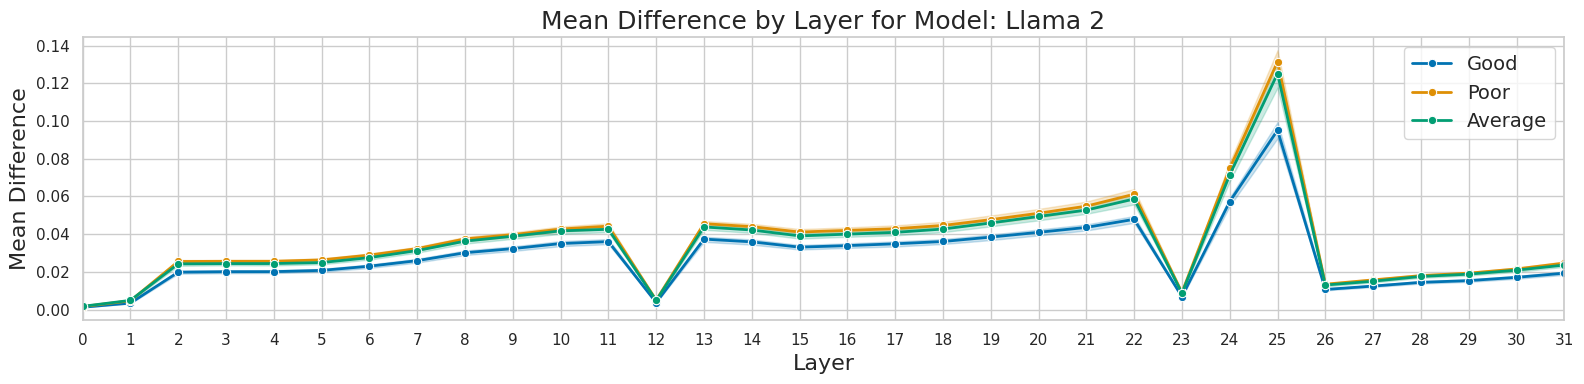

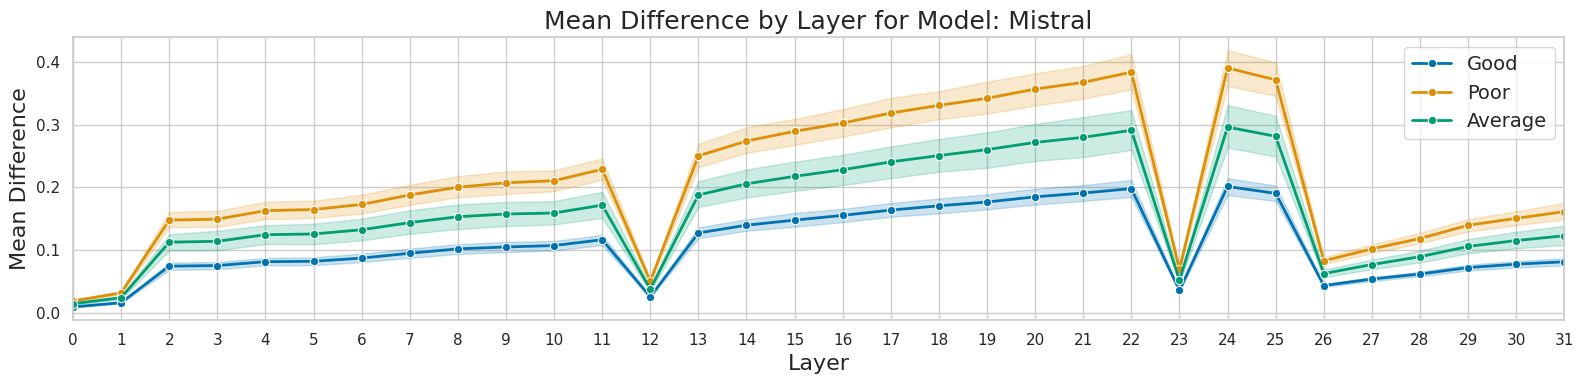

In [159]:
for model in mean_var_diff_df['Model'].unique():
    color_palette = sns.color_palette("colorblind", len(lev_bins_order))
    plt.figure(figsize=(16, 4))
    ax = sns.lineplot(
        data=mean_var_diff_df[mean_var_diff_df.Model == model],
        x='Layer',
        y='Mean Difference',
        hue='Levenshtein Bin',
        palette=color_palette,
        marker='o',
        linewidth=2
    )

    ax.set_xticks(sorted(mean_var_diff_df['Layer'].unique()))
    ax.set_xlim(0, 31)
    
    plt.xlabel('Layer', fontsize=16)
    plt.ylabel('Mean Difference', fontsize=16)
    plt.title(f'Mean Difference by Layer for Model: {model}', fontsize=18)
    
    ax.legend(loc='upper right', fontsize=14)
    plt.tight_layout()
    plt.show()


In [166]:
mean_layered_data.head()

,Model,Layer,Mean Difference,Variance Difference,CKA Value,Common Sensitive Neuron Count
0,Llama 2,0,0.001423,0.000006,0.853824,12.0
1,Llama 2,1,0.004026,0.005809,0.999922,3.0
2,Llama 2,2,0.022127,0.000789,0.407041,1.0
3,Llama 2,3,0.022313,0.000782,0.351516,1.0
4,Llama 2,4,0.022332,0.000841,0.350590,0.0


In [167]:
# Update the 'Model Type' column
mean_var_diff_df['Levenshtein Bin'] = mean_var_diff_df['Levenshtein Bin'].replace({
    'Good': 'Low',
    'Average': 'Average',
    'Poor': 'High',
})

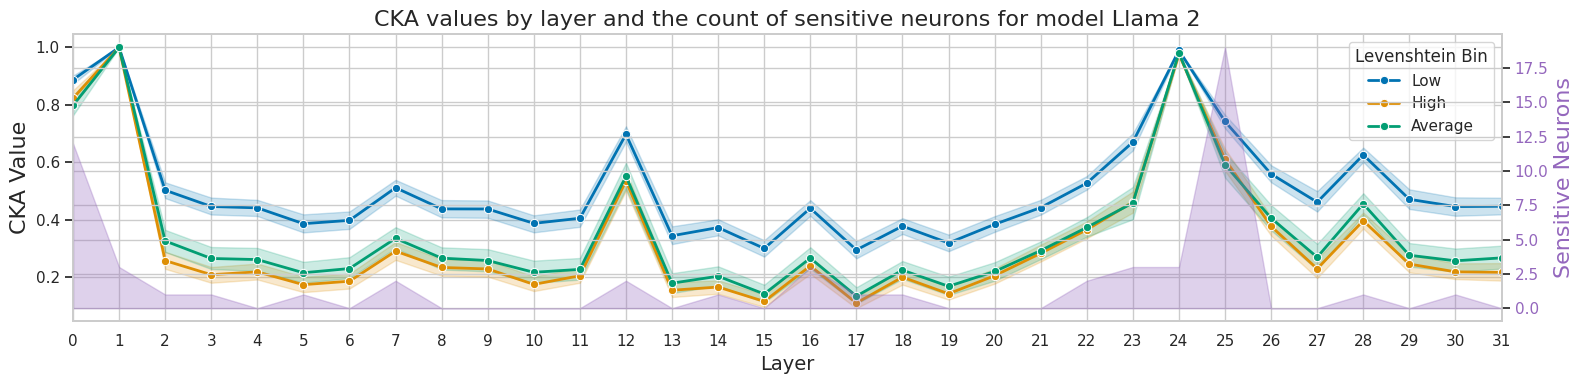

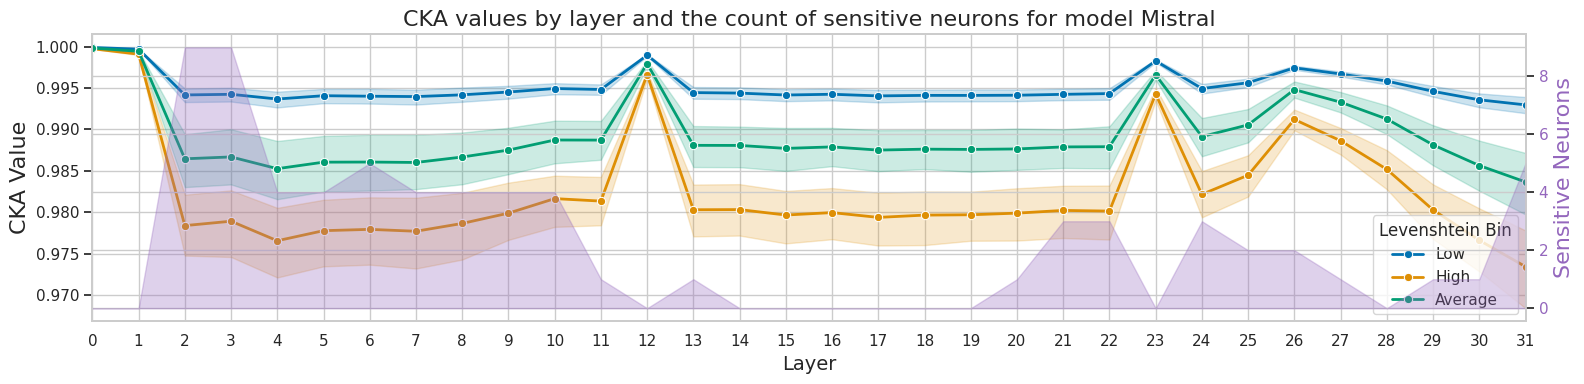

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

mean_layered_data = mean_var_diff_df.groupby(['Model', 'Layer']).agg({
    'Mean Difference': 'mean',
    'Variance Difference': 'mean',
    'CKA Value': 'mean',
    'Common Sensitive Neuron Count': 'max'  # Include the common sensitive neuron count
}).reset_index()

for model in mean_layered_data['Model'].unique():
    fig, ax1 = plt.subplots(figsize=(16, 4))
    
    ax1.set_ylabel('CKA Value', fontsize=16)
    sns.lineplot(
        data=mean_var_diff_df[mean_var_diff_df.Model == model],
        x='Layer',
        y='CKA Value',
        hue='Levenshtein Bin',
        palette=color_palette,
        marker='o',
        linewidth=2,
        ax=ax1
    )
    ax1.tick_params(axis='y')


    ax2 = ax1.twinx()
    ax2.set_ylabel('Sensitive Neurons', fontsize=16, color='tab:purple')
    ax2.fill_between(
        x=mean_layered_data[mean_layered_data.Model == model]['Layer'],
        y1=mean_layered_data[mean_layered_data.Model == model]['Common Sensitive Neuron Count'],
        color='tab:purple',
        alpha=0.3
    )
    ax2.tick_params(axis='y', labelcolor='tab:purple')

    
    # ax4 = ax1.twinx()
    # ax4.spines['right'].set_position(('outward', 120))  # Move the fourth axis out further to avoid overlap
    # ax4.set_ylabel('Sensitive Neurons', fontsize=16, color='tab:purple')
    
    # # Fill the area under the sensitive neuron count values
    # ax4.fill_between(
    #     x=mean_layered_data[mean_layered_data.Model == model]['Layer'],
    #     y1=mean_layered_data[mean_layered_data.Model == model]['Common Sensitive Neuron Count'],
    #     color='tab:purple',
    #     alpha=0.3
    # )

    ax1.set_xlim(0, 31)
    ax1.set_xticks(mean_layered_data['Layer'].unique())
    ax1.set_xlabel('Layer', fontsize=14)
    plt.title(f'CKA values by layer and the count of sensitive neurons for model {model}', fontsize=16)

    fig.tight_layout()

    plt.show()


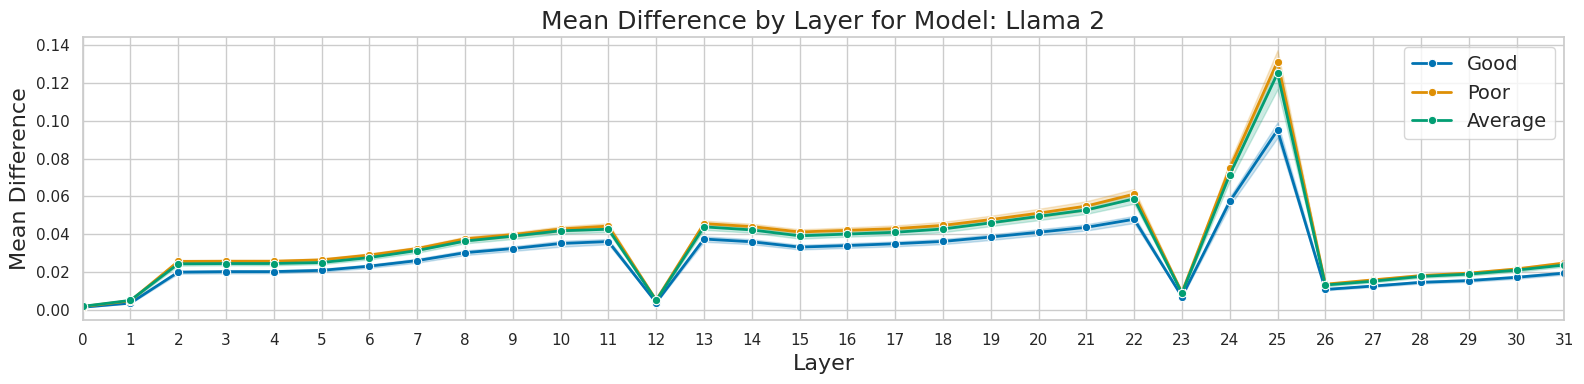

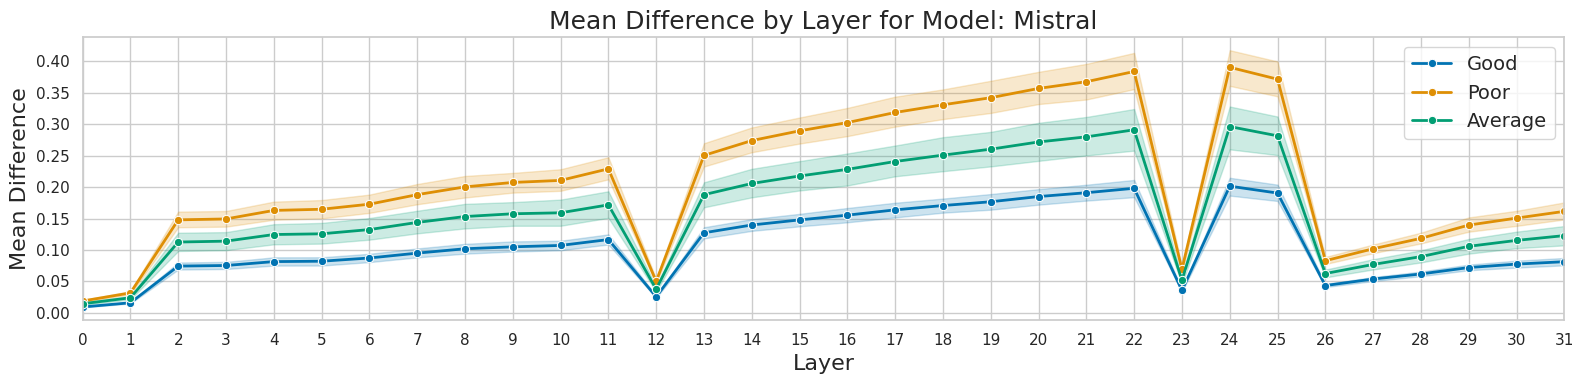

In [161]:
for model in mean_var_diff_df['Model'].unique():
    color_palette = sns.color_palette("colorblind", len(lev_bins_order))
    plt.figure(figsize=(16, 4))
    ax = sns.lineplot(
        data=mean_var_diff_df[mean_var_diff_df.Model == model],
        x='Layer',
        y='Mean Difference',
        hue='Levenshtein Bin',
        palette=color_palette,
        marker='o',
        linewidth=2
    )

    ax.set_xticks(sorted(mean_var_diff_df['Layer'].unique()))
    ax.set_xlim(0, 31)
    
    plt.xlabel('Layer', fontsize=16)
    plt.ylabel('Mean Difference', fontsize=16)
    plt.title(f'Mean Difference by Layer for Model: {model}', fontsize=18)
    
    ax.legend(loc='upper right', fontsize=14)
    plt.tight_layout()
    plt.show()


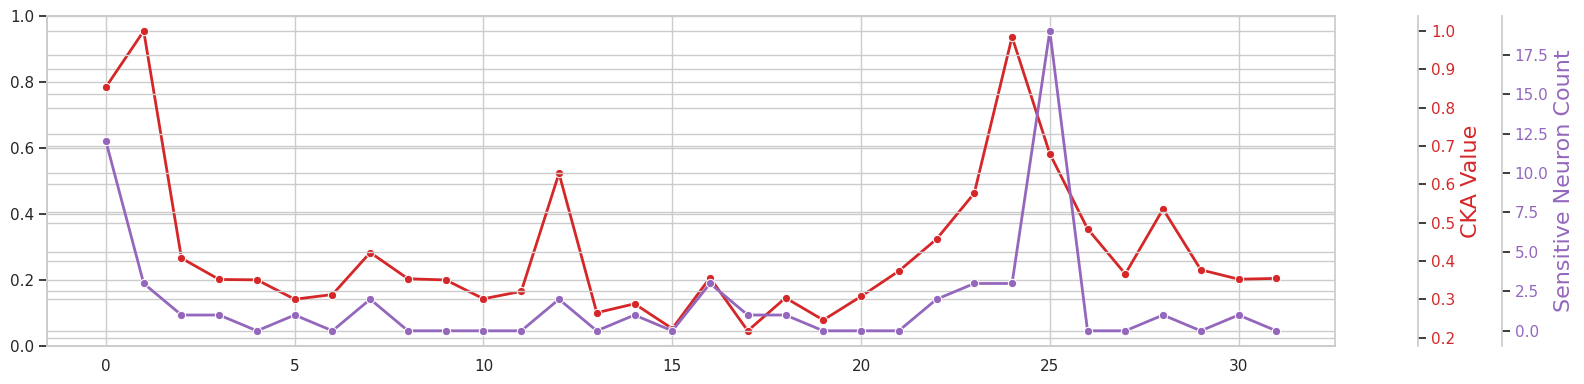

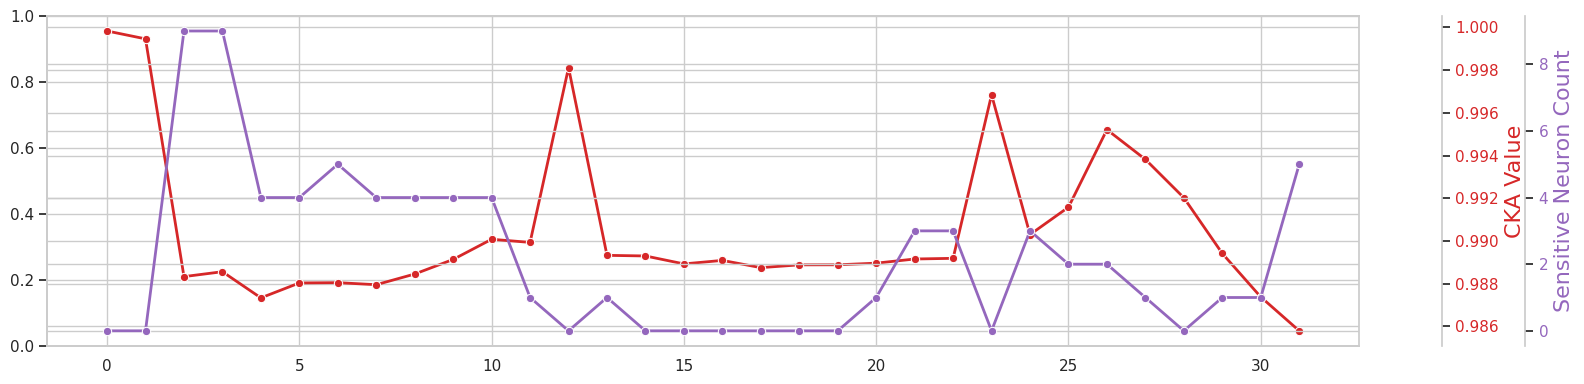

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

mean_layered_data = mean_var_diff_df.groupby(['Model', 'Layer']).agg({
    'Mean Difference': 'mean',
    'Variance Difference': 'mean',
    'CKA Value': 'mean',
    'Common Sensitive Neuron Count': 'mean'
}).reset_index()


for model in mean_layered_data['Model'].unique():
    fig, ax1 = plt.subplots(figsize=(16, 4))
    
    ax3 = ax1.twinx()
    ax3.spines['right'].set_position(('outward', 60))
    ax3.set_ylabel('CKA Value', fontsize=16, color='tab:red')
    sns.lineplot(
        data=mean_layered_data[mean_layered_data.Model == model],
        x='Layer',
        y='CKA Value',
        marker='o',
        linewidth=2,
        ax=ax3,
        color='tab:red'
    )
    ax3.tick_params(axis='y', labelcolor='tab:red')
    
    ax4 = ax1.twinx()
    ax4.spines['right'].set_position(('outward', 120)) 
    ax4.set_ylabel('Sensitive Neuron Count', fontsize=16, color='tab:purple')
    sns.lineplot(
        data=mean_layered_data[mean_layered_data.Model == model],
        x='Layer',
        y='Common Sensitive Neuron Count',
        marker='o',
        linewidth=2,
        ax=ax4,
        color='tab:purple'
    )
    ax4.tick_params(axis='y', labelcolor='tab:purple')
    
    fig.tight_layout() 
    plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

fig, ax1 = plt.subplots(figsize=(22, 4))

# sns.boxplot(
#     data=mean_var_diff_df,
#     x='Layer',
#     y='Variance Difference',
#     hue='Levenshtein Bin',
#     palette='colorblind',
#     ax=ax1
# )
# ax1.axhline(y=0.05, color='r', linestyle='--', label='Threshold')  # Example threshold
# ax1.set_xlabel('Layer', fontsize=12)
# ax1.set_ylabel('Variance Difference of Activations', fontsize=12)
# ax1.legend(title='Levenshtein Bin', title_fontsize='12', fontsize='10', loc='center left')


# sensitive_layers = [(0, 3), (6, 10), (12, 13), (15, 17), (24, 26)]  # Adjusted ranges to include all observed sensitive layers
# for start, end in sensitive_layers:
#     ax1.axvspan(start, end, color='yellow', alpha=0.3)

ax2 = ax1.twinx()

unique_cka_df = mean_var_diff_df[['Layer', 'Levenshtein Bin', 'CKA Value']].drop_duplicates()

# sns.lineplot(
#     data=unique_cka_df,
#     x='Layer',
#     y='CKA Value',
#     hue='Levenshtein Bin',
#     palette='dark',
#     ax=ax2,
#     marker='o',
#     linestyle='-'
# )
# ax2.set_ylabel('CKA Value', fontsize=12)
# ax2.set_ylim(0, 1)  # Set the y-axis limit for CKA values for better visualization
# ax2.set_xlim(0, 31)  # Set the x-axis limit to start at 0 and end at 31
# ax2.legend(title='Levenshtein Bin (CKA)', title_fontsize='12', fontsize='10', loc='lower right')

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the third axis

sns.lineplot(
    data=mean_var_diff_df,
    x='Layer',
    y='Sensitive Neuron Count',
    color='purple',
    ax=ax3,
    marker='s',
    linestyle='--'
)
ax3.set_ylabel('Common Sensitive Neuron Count', fontsize=12)
ax3.set_ylim(0, mean_var_diff_df['Common Sensitive Neuron Count'].max())  # Adjust y-axis limit for better visualization

plt.tight_layout()
plt.show()


In [ ]:
type(data_sample['activations_corrected'].iloc[0]['layer_1_corrected'])

In [ ]:
mean_var_diff_df['Layer'].unique()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

fig, ax1 = plt.subplots(figsize=(22, 4))

ax2 = ax1.twinx()

unique_cka_df = mean_var_diff_df[['Layer', 'Levenshtein Bin', 'CKA Value']].drop_duplicates()

sns.lineplot(
    data=unique_cka_df,
    x='Layer',
    y='CKA Value',
    hue='Levenshtein Bin',
    palette='dark',
    ax=ax2,
    marker='o',
    linestyle='-'
)
ax2.set_ylabel('CKA Value', fontsize=12)
ax2.set_ylim(0, 1)
ax2.legend(title='Levenshtein Bin (CKA)', title_fontsize='12', fontsize='10', loc='upper right')

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))

sns.lineplot(
    data=mean_var_diff_df,
    x='Layer',
    y='Common Sensitive Neuron Count',
    color='purple',
    ax=ax3,
    marker='s',
    linestyle='--'
)
ax3.set_ylabel('% Sensitive Neuron', fontsize=12)
ax3.set_ylim(0, mean_var_diff_df['Common Sensitive Neuron Count'].max())

plt.tight_layout()
plt.show()

In [ ]:
data_sample.iloc[0]

In [ ]:
data_sample.columns

In [ ]:
layer

In [ ]:
len(row['sensitive_neurons'])

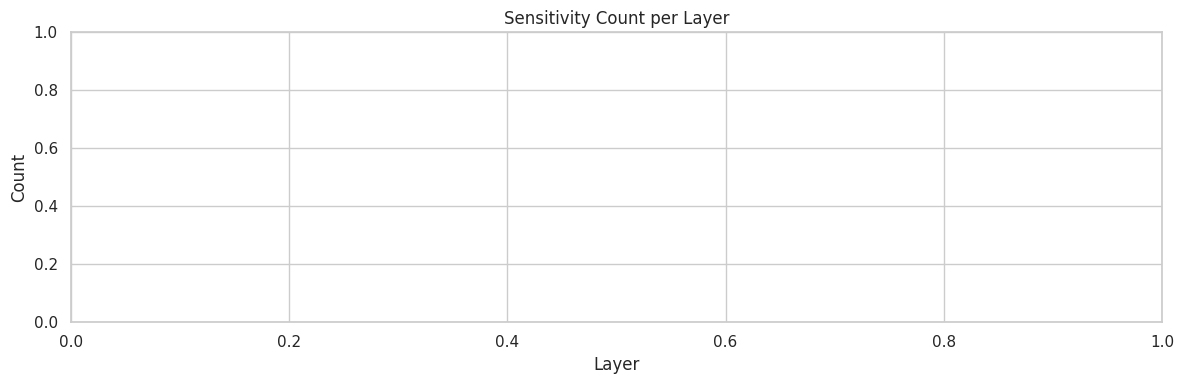

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

threshold = len(data_sample) * 0.5
universal_neurons_scores = {layer: [neuron for neuron, count in neuron_counts.items() if count > threshold]
                             for layer, neuron_counts in neuron_sensitivity_count.items()}

neuron_sensitivity_df = pd.DataFrame(neuron_sensitivity_count).transpose().reset_index()
neuron_sensitivity_df.rename(columns={'index': 'Layer'}, inplace=True)
neuron_sensitivity_df['Layer Category'] = neuron_sensitivity_df['Layer'].apply(categorize_layer)

plt.figure(figsize=(12, 4))
sns.set_style("whitegrid")
sns.barplot(data=neuron_sensitivity_df, x='Layer', y=0, hue='Layer Category', palette='colorblind')
plt.title('Sensitivity Count per Layer')
plt.xlabel('Layer')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
# data_sample['sensitivity_score_neuron'].iloc[0][0]

In [ ]:
data_sample['sensitivity_score_neuron']

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data_sample is your DataFrame
# Reshape sensitivity_score_neuron into a DataFrame
sensitivity_df = pd.DataFrame([(neuron, layer, score) 
                                for layer, scores_dict in data_sample['sensitivity_score_neuron'].items() 
                                for neuron, scores in scores_dict.items() 
                                for score in scores], columns=['Layer', 'Neuron', 'Sensitivity Score'])

In [ ]:
sensitivity_df.tail()

In [ ]:
sensitivity_df['Layer Category'] = sensitivity_df['Layer'].apply(categorize_layer)

# Plotting with Seaborn
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.violinplot(data=sensitivity_df, x='Layer Category', y='Sensitivity Score', palette='colorblind', inner='quartile')
plt.title('Distribution of Sensitivity Scores per Neuron')
plt.xlabel('Layer Category')
plt.ylabel('Sensitivity Score')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
sensitivity_df['Sensitivity Score'].max(), sensitivity_df['Sensitivity Score'].min()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sensitivity_df = pd.DataFrame([(neuron, layer, score) 
                                for layer, scores_dict in data_sample['sensitivity_score_neuron'].items() 
                                for neuron, scores in scores_dict.items() 
                                for score in scores], columns=['Layer', 'Neuron', 'Sensitivity Score'])
sensitivity_df['Layer Category'] = sensitivity_df['Layer'].apply(categorize_layer)



In [ ]:

filtered_df = sensitivity_df[sensitivity_df['Sensitivity Score'] > 0.1]

In [ ]:

# Plotting with Seaborn
plt.figure(figsize=(15, 5))
sns.set_style("whitegrid")

# Create separate plots for each layer category
for i, layer_category in enumerate(filtered_df['Layer Category'].unique(), start=1):
    plt.subplot(1, 3, i)
    sns.kdeplot(filtered_df[filtered_df['Layer Category'] == layer_category]['Sensitivity Score'], 
                label=layer_category, fill=True)
    plt.title(f'Distribution of Sensitivity Scores\n{layer_category}')
    plt.xlabel('Sensitivity Score')
    plt.ylabel('Density')
    plt.legend(title='Layer Category')

plt.tight_layout()
plt.show()
